# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

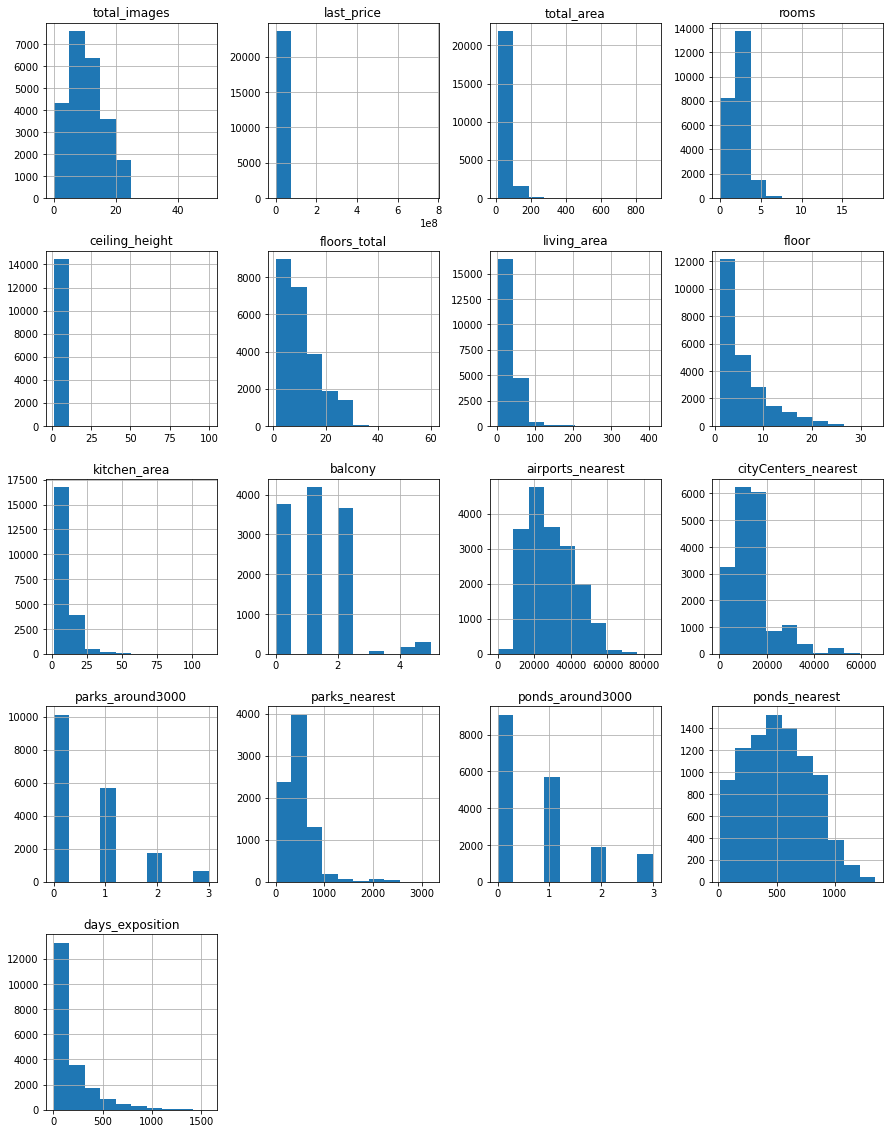

In [5]:
data.hist(figsize=(15, 20));

In [6]:
data.duplicated().sum() # выводим на экран количество строк-дубликатов в данных (их нет)

0

После первого знакомства с данными, представляющими архив объявлений о продаже квартир от сервиса Яндекс Недвижимость, можно сделать следующие выводы:

**Качество данных:** Обнаружены пропуски в данных (и в столбцах с данными, введенными пользователями, и в столбцах с автоматически полученными данными). Устранение пропусков будет важнейшей частью предобратоки данных. 

**Дубликаты:** Была сделана проверка на наличие явных дубликатов, явные дубликаты строк отсутствуют.


### Выполните предобработку данных

#### Переименование колонок
Названия столбцов `'parks_around3000'`, `'ponds_around3000'`, `'cityCenters_nearest'` надо привести к общему стилю (snake_case):

In [7]:
data = data.rename(
    columns={'parks_around3000':'parks_around_3000', 
             'ponds_around3000':'ponds_around_3000', 
             'cityCenters_nearest':'city_centers_nearest'}
)

# Проверяем:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Пропущенные значения


In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = 0, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

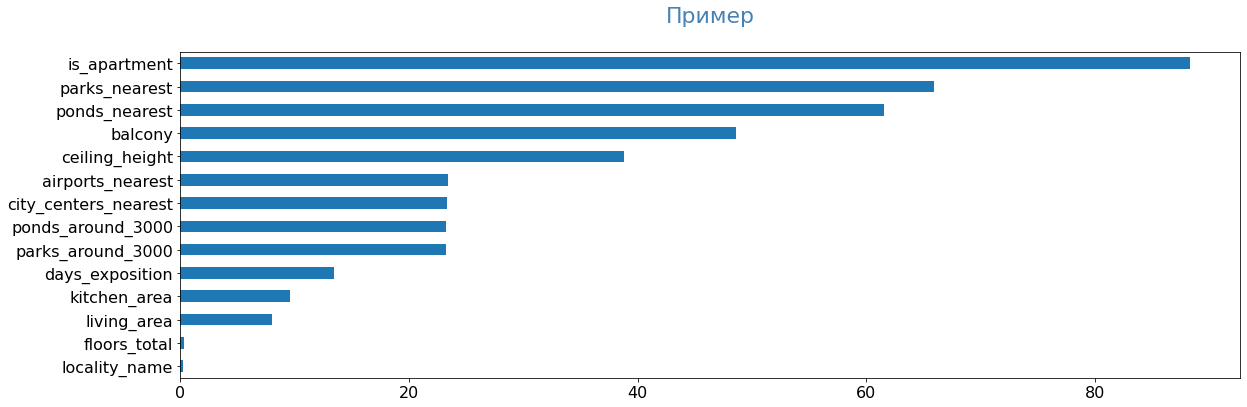

In [9]:
pass_value_barh(data)

In [10]:
print(data.isna().sum()) # выводим количество пропущенных значений для каждого столбца

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Пропуски в любом столбце может возникнуть, если продавец считает информацию несущественной, не хочет или забывает указать. так и с техническими аспектами сбора и обработки информации.


##### Столбцы `'balcony'`, `'parks_around_3000'` и `'ponds_around_3000'`:
Столбец 'balcony' (наличие и количество балконов): Скорее всего это значит, что в квартире нет балкона. Такие пропуски можно заменить на 0.

Столбцы 'balcony' , 'parks_around_3000' и 'ponds_around_3000' (количество парков и водоёмов в радиусе 3 км): Пропуски в этих столбцах можно интерпретировать как отсутствие парков или водоёмов в указанном радиусе и заменить на 0. 


In [11]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)

##### Столбец 'ceiling_height'
Изучаем столбец **'ceiling_height'** - высоту потолков. Заменяем медианным значением, так как скорее всего если высота потолков не указана, то скорее всего она стандартная либо продавец не знает точные параметры.

In [12]:
# добавляем колонку расстояния до центра города в километрах
data['distance_to_center_km'] = (data['city_centers_nearest'] / 1000).round() 
# Выделяем квартиры в Санкт-Петербурге
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

# Рассчитываем медианную высоту потолков для каждого километра в Санкт-Петербурге
median_ceilings = spb_data.groupby('distance_to_center_km')['ceiling_height'].median()

# Добавляем колонку с медианными значениями в spb_data для последующего использования
spb_data = spb_data.merge(median_ceilings.rename('median_ceiling_height'), on='distance_to_center_km', how='left')

# заполняем пропущенные значения высоты потолков, используя медианные значения
spb_data.loc[spb_data['ceiling_height'].isna(), 'ceiling_height'] = spb_data['median_ceiling_height']

# возвращаем измененные данные в основной DataFrame
data.update(spb_data[['ceiling_height']])

In [13]:
print(f'''Количество пропущенных значений высоты потолков в Санкт-Петербурге после обработки пропусков: {data[data['locality_name'] == 'Санкт-Петербург']['ceiling_height'].isna().sum()}''')
print(f'''Всего значений высоты потолков в Санкт-Петербурге: {data[data['locality_name'] == 'Санкт-Петербург']['ceiling_height'].sum()}''')

Количество пропущенных значений высоты потолков в Санкт-Петербурге после обработки пропусков: 1904
Всего значений высоты потолков в Санкт-Петербурге: 38605.745


In [14]:
# остальные пропущенные значения (не для СПБ) заполняем медианой 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

##### Столбец 'is_apartment'
Изучаем столбец 'is_apartment' (является ли объект апартаментами). Здесь пропуски можно заменить на False. Скорее всего, продавцы не заполняют эту графу при написании объявления, оттуда такое количество пропусков (большинство объектов недвижимости - квартиры, а не аппартаменты)

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(bool)

##### Столбец 'floors_total'
В принципе, тут всего 85 пропущенных значений. Удаляем строки

In [16]:
data = data.dropna(subset=['floors_total'])

#####  Столбцы 'living_area' и 'kitchen_area'


In [17]:
#создаём переменную без пропусков в столбце living_area
nan_living_area = data[['total_area','living_area']].dropna(subset = ['living_area'])
#создаём новый столбец, содержащий доли жилойплощади относительно общей площади
nan_living_area['part'] = nan_living_area['living_area']/nan_living_area['total_area']
#вставим в пустые ячейки общую площадь умноженную на медианное значение доли жилой площади
data['living_area'] = data['living_area'].fillna(data['total_area']*nan_living_area['part'].median()).astype('int')

# то же самое для kitchen_area
nan_living_area = data[['total_area','kitchen_area']].dropna(subset = ['kitchen_area'])
nan_living_area['part'] = nan_living_area['kitchen_area']/nan_living_area['total_area']
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']*nan_living_area['part'].median()).astype('int')

In [18]:
len(data.query('total_area * 0.9 <= (living_area + kitchen_area)'))

572

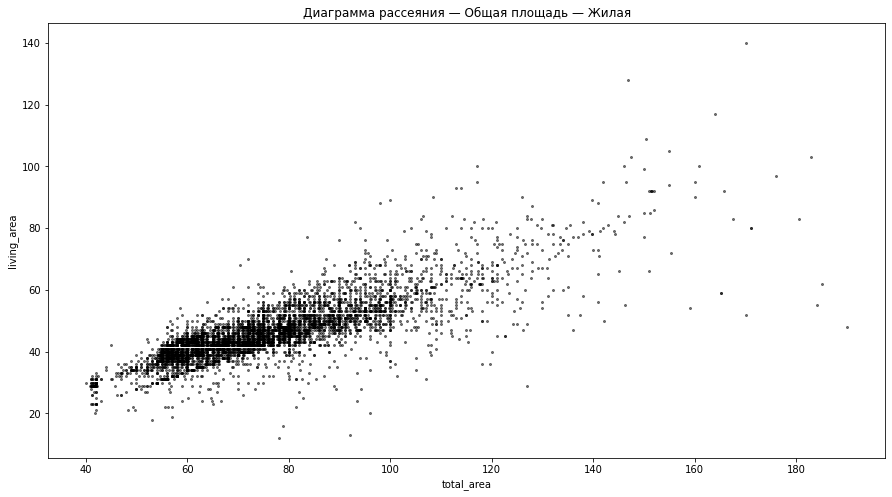

In [19]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

##### Столбец 'locality_name' 
В столбце записаны названия населенного пункта. Возможно, будет лучше эти строки либо исключить, их доля незначительна (49), а сам параметр сильно влияет на стоимость недвижимости. Возможные причины появления - технические, человеческий фактор, дома вне населенных пунктов.

In [20]:
data = data.dropna(subset=['locality_name'])

Устраняем неявные дубликаты в названиях населённых пунктов
Смотрим уникальные значения для 'locality_name'

In [21]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Устраняем неявные дубликаты в названиях населённых пунктов. Для этого удаляем лишние слова из названий населенных пунктов.
Проверяем, что всё получилось.

In [22]:
# на вход функции подаются список неправильных значений и строка с правильным значением
def replace_wrong_words(wrong_words, correct_symbol):
    for wrong_word in wrong_words:
        # Создаём шаблон регулярного выражения для удаления слова с учётом возможных пробелов до и после
        regex_pattern = r'\b' + wrong_word + r'\b'
        # Используем regex=True для поиска по шаблону и замены на correct_symbol
        data['locality_name'] = data['locality_name'].str.replace(regex_pattern, correct_symbol, regex=True)
    # После удаления всех слов, убираем лишние пробелы в начале и в конце строки
    data['locality_name'] = data['locality_name'].str.strip()
    
    
duplicates = ['коттеджный', 'городской', 'городского', 'типа', 'поселок', 'посёлок', 
              'деревня', 'село', 'садовое', 'товарищество', 'при', 'железнодорожной', 
              'станции', 'садоводческое', 'некоммерческое'] # список названий, которые можно удалить
replace_symbol = '' # удаляем слово
replace_wrong_words(duplicates, replace_symbol) # вызов функции

data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [23]:
# check
data.locality_name.nunique()

305

In [24]:
# Ищем дубликаты по сумме ключевых параметров:
data[data.duplicated(['total_area', 'floor', 'floors_total', 'rooms', 'locality_name', 
                      'city_centers_nearest', 'parks_nearest', 'ponds_nearest'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,distance_to_center_km
1376,6,2500000.0,42.0,2019-03-06T00:00:00,2,2.60,5.0,29,3,False,...,1.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN
2395,9,1750000.0,44.0,2016-06-09T00:00:00,1,2.60,5.0,18,1,False,...,0.0,Кириши,NaN,NaN,0.0,NaN,0.0,NaN,22.0,NaN
3568,17,4950000.0,58.0,2018-02-20T00:00:00,3,2.50,9.0,39,4,False,...,0.0,Санкт-Петербург,31691.0,12580.0,0.0,NaN,0.0,NaN,264.0,13.0
3576,9,5250000.0,57.1,2015-04-06T00:00:00,3,2.60,9.0,39,8,False,...,1.0,Санкт-Петербург,19816.0,11347.0,0.0,NaN,0.0,NaN,508.0,11.0
4606,12,2900000.0,74.0,2017-12-14T00:00:00,3,2.59,5.0,42,4,False,...,0.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,3,22529250.0,139.5,2018-07-04T00:00:00,4,3.30,16.0,82,9,False,...,0.0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0,8.0
23541,16,5200000.0,63.0,2017-10-27T00:00:00,3,2.55,12.0,41,4,False,...,0.0,Санкт-Петербург,49631.0,14525.0,2.0,672.0,1.0,172.0,165.0,15.0
23548,14,2250000.0,36.0,2017-10-14T00:00:00,1,2.50,5.0,17,5,False,...,0.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,425.0,NaN
23643,1,660000.0,45.0,2019-02-19T00:00:00,2,2.64,5.0,31,4,False,...,1.0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


In [25]:
# удаляем найденные дубликаты
data = data.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'rooms', 'locality_name', 
                                    'city_centers_nearest', 'parks_nearest', 'ponds_nearest'], keep='first')

**airports_nearest, city_centers_nearest, parks_nearest,  ponds_nearest (расстояния до важных объектов и их количество):** Эти пропуски могут быть заполнены на основе медианных значений по населённым пунктам (locality_name). Эта информация может быть не указана продавцом из-за незнания точных параметров или её считают не требующей указания.

In [167]:
def fill_with_median(x):
    # Если в группе есть ненулевые значения, заполняем пропуски медианой
    if x.count() > 0:
        return x.fillna(x.median())
    # Иначе возвращаем исходную серию без изменений
    return x

data['city_centers_nearest'] = data.groupby('locality_name')['city_centers_nearest'].transform(fill_with_median)


In [28]:
# check
data.groupby('locality_name')['city_centers_nearest'].mean()[10:30]

locality_name
Бокситогорск         NaN
Большая Вруда        NaN
Большая Ижора        NaN
Большая Пустомержа   NaN
Большие Колпаны      NaN
Большое Рейзино      NaN
Большой Сабск        NaN
Бор                  NaN
Борисова Грива       NaN
Бугры                NaN
Будогощь             NaN
Ваганово             NaN
Важины               NaN
Вартемяги            NaN
Вахнова Кара         NaN
Вещево               NaN
Виллози              NaN
Вознесенье           NaN
Возрождение          NaN
Войсковицы           NaN
Name: city_centers_nearest, dtype: float64

In [29]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23356 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23356 non-null  int64  
 1   last_price             23356 non-null  float64
 2   total_area             23356 non-null  float64
 3   first_day_exposition   23356 non-null  object 
 4   rooms                  23356 non-null  int64  
 5   ceiling_height         23356 non-null  float64
 6   floors_total           23356 non-null  float64
 7   living_area            23356 non-null  int64  
 8   floor                  23356 non-null  int64  
 9   is_apartment           23356 non-null  bool   
 10  studio                 23356 non-null  bool   
 11  open_plan              23356 non-null  bool   
 12  kitchen_area           23356 non-null  int64  
 13  balcony                23356 non-null  float64
 14  locality_name          23356 non-null  object 
 15  ai

In [169]:
global_median = data['city_centers_nearest'].median()

def fill_with_median(x):
    return x.fillna(x.median() if x.count() > 0 else global_median)

data['city_centers_nearest'] = data.groupby('locality_name')['city_centers_nearest'] \
                                     .transform(fill_with_median)


In [31]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23356 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23356 non-null  int64  
 1   last_price             23356 non-null  float64
 2   total_area             23356 non-null  float64
 3   first_day_exposition   23356 non-null  object 
 4   rooms                  23356 non-null  int64  
 5   ceiling_height         23356 non-null  float64
 6   floors_total           23356 non-null  float64
 7   living_area            23356 non-null  int64  
 8   floor                  23356 non-null  int64  
 9   is_apartment           23356 non-null  bool   
 10  studio                 23356 non-null  bool   
 11  open_plan              23356 non-null  bool   
 12  kitchen_area           23356 non-null  int64  
 13  balcony                23356 non-null  float64
 14  locality_name          23356 non-null  object 
 15  ai

##### Столбец 'city_centers_nearest' 

Изучаем столбец **'city_centers_nearest'** (расстояние до центра города). Построим гистограмму:

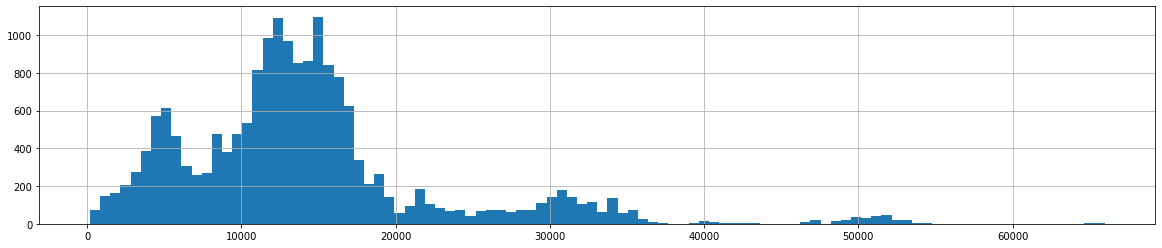

In [32]:
data['city_centers_nearest'].hist(figsize=(20, 4), bins=100);

Построим диаграмму рассеяния, которая покажет отношение между расстоянием до центра и ценой недвижимости.

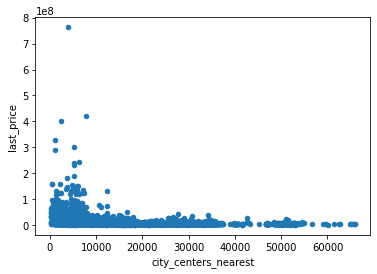

In [33]:
data.plot(x='city_centers_nearest', y='last_price', kind='scatter');

На графике явно заметно, что квартиры близко к центру дороже, чем квартиры далеко от центра. Значит, это важный параметр, влияющий на стоимость и заполнение его медианой или средним может значительно исказить результат.

Из начального знакомства с данными известно, что этом столбце было 5519 пропущенных значений (сейчас уже часть удалена). Изучаем распределение пропусков по городам до заполнения значений в **'city_centers_nearest'**

In [34]:
# Ищем количество пропущенных значений в столбце 'city_сenters_nearest'
data[data['city_centers_nearest'].isna()]['locality_name'].value_counts().sum()

5283

In [35]:
# Выводим 10 населенных пунктов с наибольшим количеством пропусков в столбце
missing_city_center = data[data['city_centers_nearest'].isna()]['locality_name'].value_counts().head(10)
missing_city_center

Мурино             576
Кудрово            467
Всеволожск         390
Гатчина            278
Выборг             215
Новое Девяткино    143
Сертолово          137
Кириши             115
Бугры              112
Волхов             105
Name: locality_name, dtype: int64

In [36]:
missing_city_center.sum()

2538

Пропуски есть в 287 населенных пунктах.

Половина пропусков (2538) приходятся на первые 10 населенных пунктов. 

In [37]:
# Выводим на экран общее количество объявлений для них
localities = ['Мурино', 'Кудрово', 'Всеволожск', 'Гатчина', 'Выборг', 
              'Новое Девяткино', 'Сертолово', 'Кириши', 'Бугры', 'Волхов']
for locality in localities:
    print(locality, data[data['locality_name'] == locality].shape[0])

Мурино 576
Кудрово 467
Всеволожск 390
Гатчина 278
Выборг 215
Новое Девяткино 143
Сертолово 137
Кириши 115
Бугры 112
Волхов 105


Оказывается, в этих населенных пунктах нигде не заполнено расстояние до центра. То есть мы ничего не можем сказать о влиянии этого параметра на стоимость квартир в данных населенных пунктах. Значит нужно оставить пропуски как есть, так как если заполнить их медианой или средним, то это может сильно исказить результаты и выводы.

In [38]:
# Смотрим общее количество объявлений по городам
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15601
Мурино               576
Кудрово              467
Шушары               438
Всеволожск           390
Пушкин               367
Колпино              338
Парголово            326
Гатчина              278
Выборг               215
Name: locality_name, dtype: int64

Больше всего объявлений в датафрейме - в Санкт-Петербурге

In [39]:
# считаем количество пропусков в 'cityCenters_nearest' в Санкт-Петербурге
data[(data['city_centers_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')].shape[0]

0

Всего 60 строк пропущено, удаляем их

In [40]:
# Удаление строк, где 'city_centers_nearest' пропущены и 'locality_name' равно 'Санкт-Петербург'
data = data[~((data['city_centers_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург'))]

In [41]:
# Проверяем
data[(data['city_centers_nearest'].isna()) & (data['locality_name'] == 'Санкт-Петербург')].shape[0]

0

**Вывод:** 

Распределение пропусков: Половина из всех пропусков (2538 из 5352) приходится на первые 10 населённых пунктов с наибольшим количеством объявлений (после Санкт-Петербурга). Это указывает на систематические проблемы в сборе данных в этих регионах.

Обработка пропусков для Санкт-Петербурга: Принято решение удалить 60 строк с пропущенными значениями для Санкт-Петербурга, так как это небольшая часть от общего количества объявлений (15601), а сам параметр может оказать большое влияния на стоимость квартир.

Решение для других населённых пунктов: Пропуски в других населённых пунктах оставлены без изменений, чтобы избежать искажения результатов.

##### Столбец 'airports_nearest'

Изучаем столбец **'airports_nearest'** (расстояние до ближайшего аэропорта). Построим гистограмму:

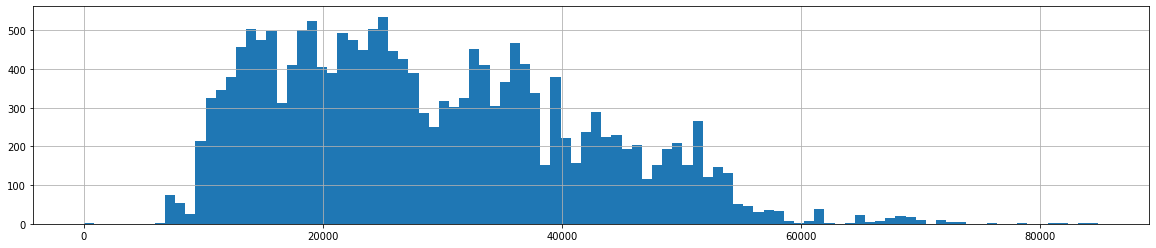

In [42]:
data['airports_nearest'].hist(figsize=(20, 4), bins=100);

Построим диаграмму рассеяния, которая покажет зависимость между расстоянием до аэропорта и ценой недвижимости.

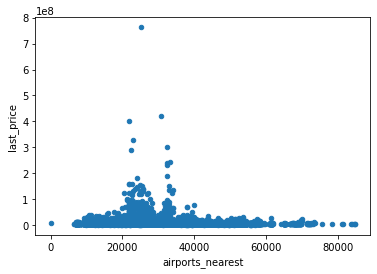

In [43]:
data.plot(x='airports_nearest', y='last_price', kind='scatter');

Как показывает график, нет явной зависимости цены от расстояния до аэропорта. Наиболее дорогие объекты находятся на удалении от 2-х до 3,5 км.

In [44]:
# Ищем количество пропущенных значений в столбце
data[data['airports_nearest'].isna()]['locality_name'].value_counts().sum()

5375

In [45]:
# Выводим 10 населенных пунктов с наибольшим количеством пропусков в столбце
data[data['airports_nearest'].isna()]['locality_name'].value_counts().head(10)

Мурино             576
Кудрово            467
Всеволожск         390
Гатчина            278
Выборг             215
Новое Девяткино    143
Сертолово          137
Кириши             115
Бугры              112
Волхов             105
Name: locality_name, dtype: int64

**Вывод:** Пропуски в тех же самых объявлениях, что и в столбце 'city_centers_nearest'. Это подтверждает подозрение на проблемы в сборе данных в этих населенных пунктах. Расстояние до аэропорта не является важным фактором, влияющим на стоимость жилья, поэтому оставим всё как есть.

##### Столбец 'parks_nearest'

Изучаем столбец **'parks_nearest'** (расстояние до ближайшего парка). Построим гистограмму:

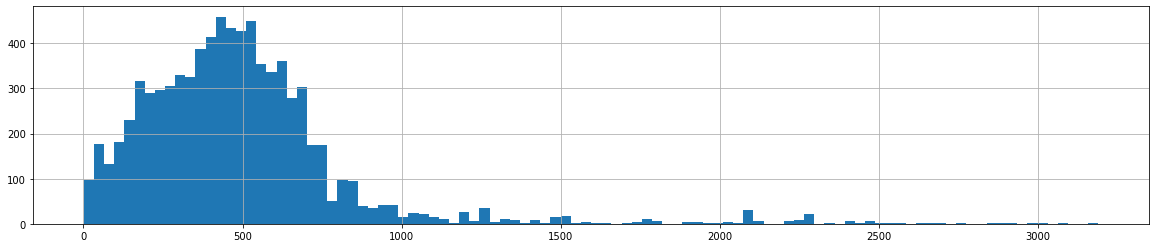

In [46]:
data['parks_nearest'].hist(figsize=(20, 4), bins=100);

Большинство объектов недвижимости находится в относительной близости к паркам (от 0 до 800 метров), пиковые значения примерно 300-600 метров.

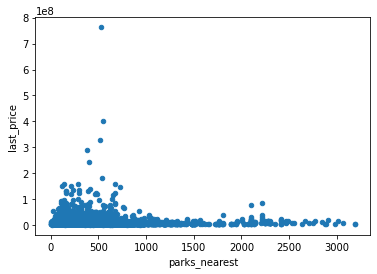

In [47]:
data.plot(x='parks_nearest', y='last_price', kind='scatter');

Можно сказать, что близость парка оказывает определенное влияние на цену недвижимости (наиболее дорогие квартиры располагаются на удалении до 700 метров к паркам)

In [48]:
# Смотрим количество пропусков в столбце
data[data['parks_nearest'].isna()]['locality_name'].value_counts().sum()

15350

In [49]:
# Выводим 10 населенных пунктов с наибольшим количеством пропусков в столбце
data[data['parks_nearest'].isna()]['locality_name'].value_counts().head(10)

Санкт-Петербург    8372
Мурино              576
Кудрово             467
Шушары              438
Всеволожск          390
Парголово           316
Гатчина             278
Выборг              215
Колпино             205
Пушкин              155
Name: locality_name, dtype: int64

Пропуски ожидаемо наблюдаются в Мурино, Кудрово, Всеволожске и проч.
Но появляются пропуски в других городах - Шушары, Парголово, Колпино, Пушкин итд. 
Больше всего пропусков (8312) в Санкт-Петербурге

**Вывод:** 
На основе построенных графиков можно сказать, что близость парка оказывает определенное влияние на цену недвижимости.
Но данных пропущено слишком много (более 65%), поэтому сложно делать выводы. Заполнение средним или медианой может сильно исказить результаты, поэтому решено оставить пропуски как есть и в будущем.
В будущем надо обратить внимание на разметку парков на карте, в том числе в Санкт-Петербурге.

##### Столбец 'ponds_nearest'

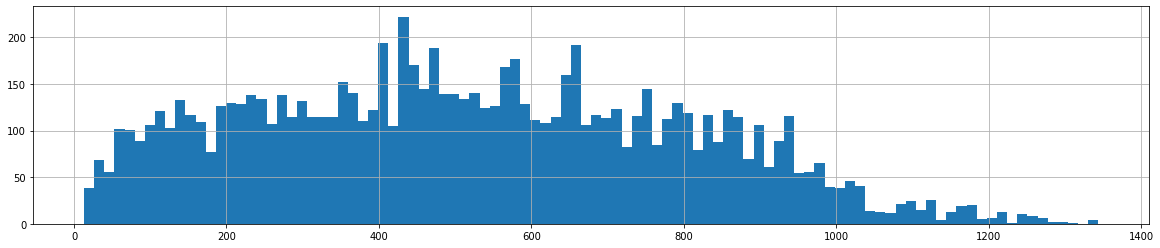

In [50]:
data['ponds_nearest'].hist(figsize=(20, 4), bins=100);

In [51]:
# Смотрим количество пропусков в столбце
data[data['ponds_nearest'].isna()]['locality_name'].value_counts().sum()

14349

In [52]:
# Выводим 10 населенных пунктов с наибольшим количеством пропусков в столбце
data[data['ponds_nearest'].isna()]['locality_name'].value_counts().head(10)

Санкт-Петербург    7692
Мурино              576
Кудрово             467
Всеволожск          390
Шушары              286
Гатчина             278
Парголово           270
Выборг              215
Пушкин              190
Красное Село        163
Name: locality_name, dtype: int64

Ожидаемые пропуски в Мурино, Кудрово, Всеволожске и проч., а также в других городах - Шушары, Парголово, Пушкин итд. 
Больше всего пропусков (7632) в Санкт-Петербурге

<AxesSubplot:xlabel='ponds_nearest', ylabel='last_price'>

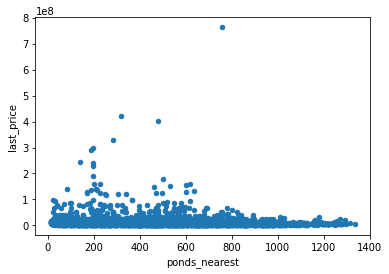

In [53]:
# Смотрим, есть корреляция между этими двумя значениями (выбираем строки 'ponds_nearest' с заполненными значениями)
spb_data.plot(x='ponds_nearest', y='last_price', kind='scatter')

**Вывод:** Значимой корреляции между ценой и расстоянием до прудов не прослеживается (на графике равномерное распределение точек по оси расстояния) Наиболее дорогие квартиры (от 10 млн рублей) находятся на расстоянии от 600-800 метров до пруда, но это довольно ограниченное количество объектов. В принципе тут можно заполнить столбцы медианным значением, однако данных пропущено слишком много (более 60%), поэтому такое заполнение может исказить результаты. Поэтому решено оставить пропуски как есть.
ПОдтверждаются большие проблемы со сбором автоматических данных (возможно, парки и пруды во многих местах просто не размечены. Например, в Санкт-Петербурге).

##### Столбец 'days_exposition'
Изучаем столбец с количеством дней размещения объявления.
Пробую понять, по какой причине могут образоваться пропуски. Для этого вывожу строки с пропущенными значениями.

In [54]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,distance_to_center_km
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.60,24.0,40,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,12.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.70,22.0,22,3,False,...,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,12.0
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.55,9.0,30,7,False,...,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,13.0
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29,9,False,...,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71,17,False,...,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN,11.0
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17,5,False,...,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN,52.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73,3,False,...,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,4.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.64,3.0,29,1,False,...,0.0,Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN


В таблице есть объявления с пропущенным значением в столбце days_exposition  от 2017, 2018, 2019го года.

**Возможные причины:**

1. Объявления ещё активны
2. Снятие объявлений без фиксации даты (Продавцы могли намеренно не указывать продолжительность размещения)
3. Технические ошибки при сборе или передачи данных

Тут я пока решаю оставить пропуски как есть, потому что сложно отследить влияние этого значения.
Бывает, что объявление о продаже одной и той же квартиры выкладывается несколько раз. Бывает, что объявление снимается без продажи (вроде как по этой таблице в принципе мы не можем утверждать, что сделка о продаже состоялась). 

В общем, пропущенные значения заполнены там, где это возможно:

In [55]:
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height               0
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5375
city_centers_nearest      5283
parks_around_3000            0
parks_nearest            15350
ponds_around_3000            0
ponds_nearest            14349
days_exposition           3133
distance_to_center_km     5352
dtype: int64

#### Устанавливаем корректный тип данных

Столбцы, в которых нужно изменить тип данных: 

**'floors_total'**, **'balcony'**, **'parks_around3000'**, **'ponds_around3000'**, **'days_exposition'** надо преобразовать в int, поскольку эти столбцы представляют собой счётные значения (количество этажей, балконов, парков и дней). Int удобней для расчётов и анализа, оптимизации памяти и улучшения читаемости.


In [56]:
columns_to_convert = ['floors_total', 'balcony', 'parks_around_3000', 'ponds_around_3000', 'days_exposition']

for column in columns_to_convert:
    data[column] = data[column].fillna(0).astype(int)

**'first_day_exposition'** 
Проверяем формат даты

В каждом столбце установлен корректный тип данных.
 Объяснено, в каких столбцах изменён тип данных и почему.

In [57]:
data['first_day_exposition'].dtypes

dtype('O')

Тип данных dtype('O') в pandas означает, что данные в столбце first_day_exposition имеют тип "объект", то есть даты в этом столбце представлены в виде строк. Для удобства в работе с датами надо преобразовать их в формат даты и времени с помощью pd.to_datetime()

In [58]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23356, dtype: datetime64[ns]

In [59]:
#Проверяем типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23356 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23356 non-null  int64         
 1   last_price             23356 non-null  float64       
 2   total_area             23356 non-null  float64       
 3   first_day_exposition   23356 non-null  datetime64[ns]
 4   rooms                  23356 non-null  int64         
 5   ceiling_height         23356 non-null  float64       
 6   floors_total           23356 non-null  int64         
 7   living_area            23356 non-null  int64         
 8   floor                  23356 non-null  int64         
 9   is_apartment           23356 non-null  bool          
 10  studio                 23356 non-null  bool          
 11  open_plan              23356 non-null  bool          
 12  kitchen_area           23356 non-null  int64         
 13  b

#### Обработка аномальных значений



In [60]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,356.00","23,356.00","23,356.00","23,356.00","23,356.00","23,356.00","23,356.00","23,356.00","23,356.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.00,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.00,112.00,33.00,60.00
median,2.00,52.00,2.64,73.00,"4,650,000.00",30.00,9.00,4.00,9.00


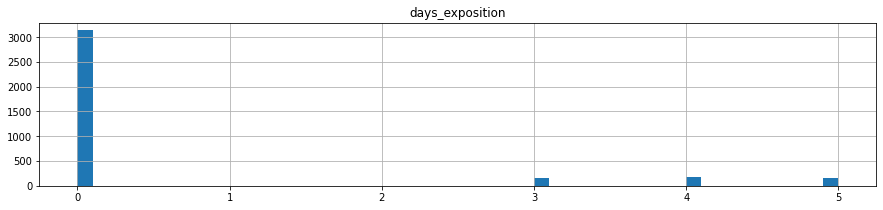

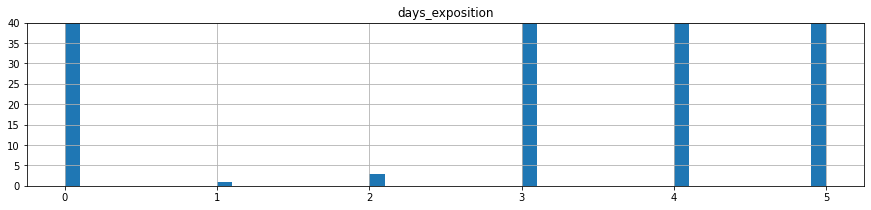

In [61]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [62]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,0.00,"560,130.00",9.00,3.00,1.00,2.00
0.01,1.00,25.32,2.50,0.00,"1,000,000.00",13.00,4.00,1.00,2.00
0.5,2.00,52.00,2.64,73.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.99,5.00,197.95,3.69,"1,043.00","36,000,000.00",122.00,35.00,23.00,26.00
0.9988,8.00,380.00,8.00,"1,361.97","124,986,480.00",229.92,63.00,26.00,35.00


##### Столбец 'rooms'

In [63]:
# Выводим на экран все уникальные значения в столбце
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

In [64]:
data.rooms.value_counts()

1     7925
2     7823
3     5731
4     1166
5      324
0      194
6      103
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

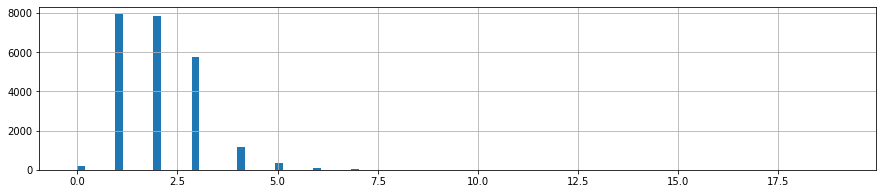

In [65]:
# Строим гистограмму
data.rooms.hist(bins = 100, figsize = (15,3));

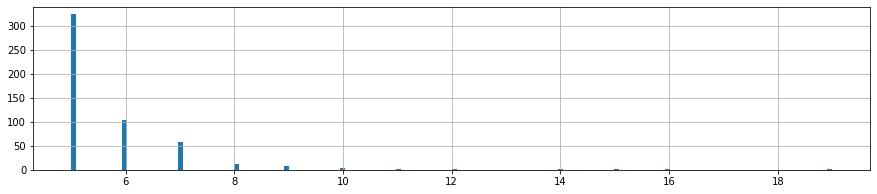

In [66]:
# Приближаем часть графика от 5 до 19 комнат
data.rooms.hist(bins = 150, figsize = (15,3), range = (5, 19));

Квартиры с количеством комнат больше 7 для нашего исследования - уникальные объекты, по которым необходимо проводить отдельную работу. Поэтому имеет смысл удалить их.

In [67]:
# Считаем количество строк с количеством комнат больше 7ми
data[data['rooms'] > 7].shape[0]

31

In [68]:
# Удаляем
data = data[data['rooms'] <= 7].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

23325

##### Столбец 'total_area'

In [69]:
data['total_area'].describe()

count    23325.000000
mean        60.048581
std         34.215973
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        631.200000
Name: total_area, dtype: float64

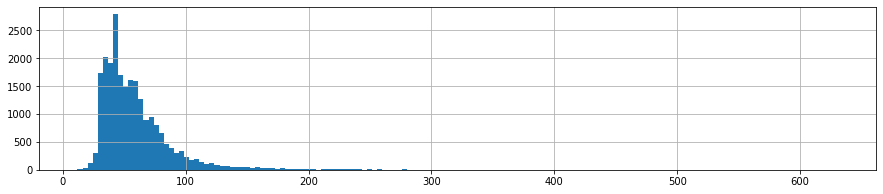

In [70]:
# Строим гистаграмму
data.total_area.hist(bins = 150, figsize = (15,3));

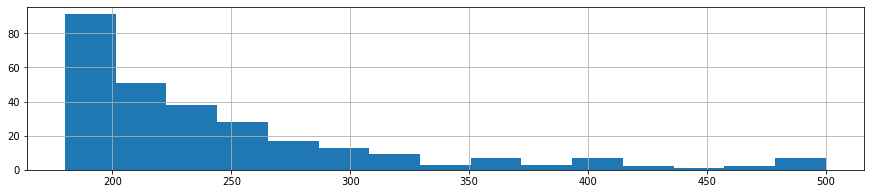

In [71]:
# Ограничим диапазон значениями от 180 до 500 квадратных метров
data.total_area.hist(bins = 15, figsize = (15,3), range = (180,500));

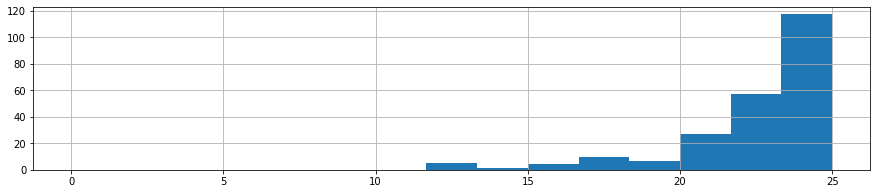

In [72]:
# Ограничим диапазон значениями от 0 до 25 квадратных метров
data.total_area.hist(bins = 15, figsize = (15,3), range = (0,25));

In [73]:
# Считаем количество строк с площадью меньше 20 и больше 250 метров
data[(data['total_area'] < 20) | (data['total_area'] > 250)]['total_area'].count()

121

In [74]:
# Удаляем строки с площадью меньше 20 и больше 250 метров
data = data[~((data['total_area'] < 20) | (data['total_area'] > 250))].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

23204

##### Столбец 'ceiling_height'

In [75]:
data['ceiling_height'].describe()

count    23204.000000
mean         2.758248
std          1.177252
min          1.000000
25%          2.600000
50%          2.640000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

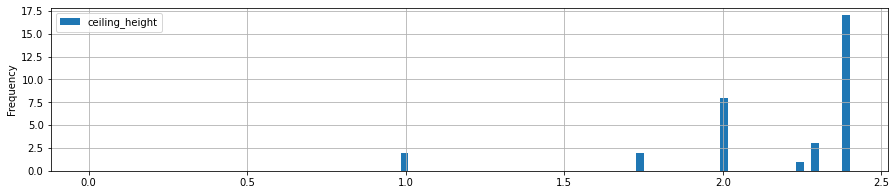

In [76]:
# Строим гистаграмму распределения аномальных значений (высота меньше 2.3 метров)
data.plot(y = 'ceiling_height', bins = 100, grid = True, kind = 'hist', figsize = (15,3), range=(0, 2.4));

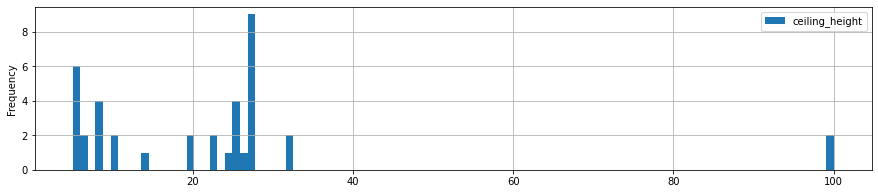

In [77]:
# Строим гистаграмму распределения аномальных значений (высота больше 5 метров)
data.plot(y = 'ceiling_height', bins = 100, grid = True, kind = 'hist', figsize = (15,3), range=(5, 100));

In [78]:
# Фильтруем строки с нестандартными значениями высоты потолков, считаем их количество
data[(data['ceiling_height'] > 5) | (data['ceiling_height'] < 2.4)]['ceiling_height'].value_counts().to_frame()

,ceiling_height
2.00,8
27.00,7
25.00,4
8.00,3
2.30,3
1.00,2
5.80,2
20.00,2
6.00,2
10.30,2


Значения между 24 и 50 метрами скорее всего, опечатки, можно восстановить значения

In [79]:
# Условие, что высота потолка находится между 24 и 50 метрами
condition = (data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 50)

# Корректируем высоту потолков, деление на 10 для ошибочных значений
data.loc[condition, 'ceiling_height'] = data.loc[condition, 'ceiling_height'] / 10

In [80]:
data[(data['ceiling_height'] < 2.4) | (data['ceiling_height'] > 5)]['ceiling_height'].count()

37

Количество строк с такими значениями - 38. Можно удалить их

In [81]:
# Исключаем строки, где высота потолков ниже 2 метров или выше 5 метров
data = data[~((data['ceiling_height'] < 2.3) | (data['ceiling_height'] > 5))].reset_index(drop=True)

count    23170.000000
mean         2.726333
std          0.244829
min          2.300000
25%          2.600000
50%          2.640000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

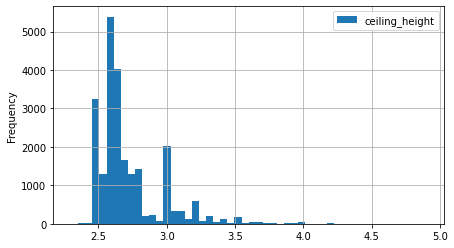

In [82]:
# Строим гистаграмму,
data.plot(y = 'ceiling_height', bins = 50, grid = True, kind = 'hist', figsize = (7,4))

# Проверяем основные значения в столбце после удаления строк
data['ceiling_height'].describe()

In [83]:
# Проверяем количество строк после удаления
data.shape[0]

23170

##### Столбец 'days_exposition'

In [84]:
data['days_exposition'].describe()

count    23170.000000
mean       155.840829
std        212.674799
min          0.000000
25%         22.000000
50%         73.000000
75%        197.000000
max       1580.000000
Name: days_exposition, dtype: float64

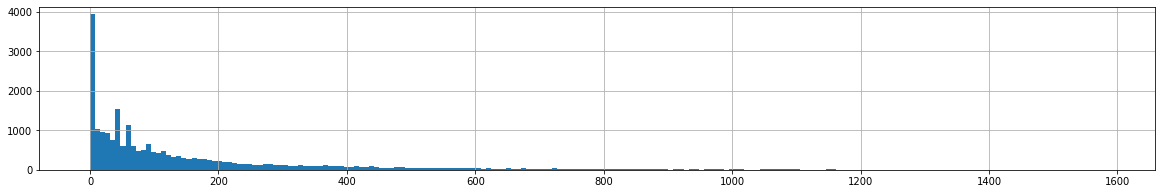

In [85]:
# Строим гистаграмму
data.days_exposition.hist(bins = 200, figsize = (20,3));

На гистаграмме наблюдается пик в районе 0 и длинный хвост до 1600 дней. 

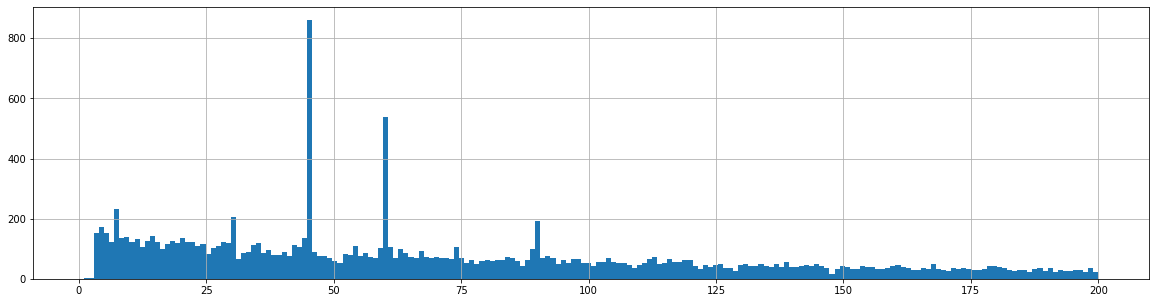

In [86]:
# Строим гистаграмму от 1 до 200 дней
data.days_exposition.hist(bins = 200, figsize = (20,5), range=(1, 200));

In [87]:
# Находим выбивающиеся значения
data['days_exposition'].value_counts().head(10)

0     3103
45     861
60     537
7      231
30     205
90     193
4      171
3      154
5      151
14     144
Name: days_exposition, dtype: int64

Среднее значение - 156 дней, медиана - 74 дня.

Выявлены выбивающиеся значения: 0, 7, 30, 45, 60, 90 день. 
Причины их появления:
1. Объявления, которые были удалены или сняты с публикации в день размещения (по разным причинам), могут автоматически получить значение days_exposition равное 0.
2. Сроки публикации на яндексе соответствуют этим дням (информация проверена на сайте Яндекс Недвижимости).

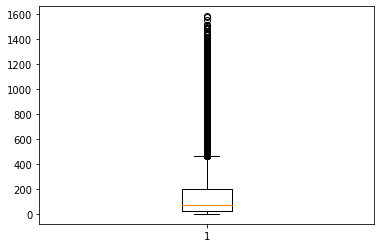

In [88]:
plt.boxplot(data['days_exposition']);

На графике boxplot видно, что "нормальные" данные находятся в диапазоне 1 - 250, выбросы находятся на отметке 500 дней и больше. 

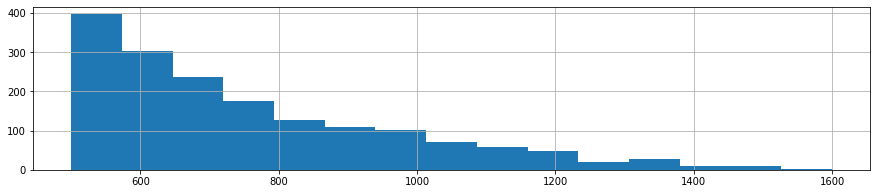

In [89]:
# Ограничим диапазон значениями от 500 до 1600 дней
data.days_exposition.hist(bins = 15, figsize = (15,3), range = (500,1600));

In [90]:
data[data['days_exposition'] > 800].shape[0]

567

Чтобы не потерять большое количество строк, удалим только объявления, находящиеся в продаже более 800 дней

In [91]:
# Удаляем строки с days_exposition > 800
data = data[data['days_exposition'] <= 800].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

22603

##### Столбец 'last_price'


In [92]:
data['last_price'].describe().apply(lambda x: format(x, ',.2f'))

count         22,603.00
mean       6,145,809.62
std        6,950,323.27
min           12,190.00
25%        3,420,000.00
50%        4,600,000.00
75%        6,700,000.00
max      330,000,000.00
Name: last_price, dtype: object

Большая разница между медианным и средним значениями цены, очень большой разброс между значением 75-го процентиля и максимальной ценой, что указывает на наличие выбросов в виде экстремально дорогих квартир. Давайте посчитаем количество таких выбросов и, при необходимости, исключим их из анализа.

In [93]:
data[data['last_price'] > 30000000].shape[0]

216

In [94]:
data = data[data['last_price'] <= 30000000].reset_index(drop=True)

In [95]:
# Ищем значения меньше 100000
data[data['last_price'] < 100000.0].shape[0]

1

In [96]:
# Удаляем строки с выбивающимися значениями
data = data[~((data['last_price'] < 300000.0) | (data['last_price'] > 30000000))].reset_index(drop=True)

# Проверяем размер DataFrame после удаления строк
data.shape[0]

22386

In [97]:
data['last_price'].describe().apply(lambda x: format(x, ',.2f'))

count        22,386.00
mean      5,689,970.60
std       3,932,016.43
min         430,000.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,600,000.00
max      30,000,000.00
Name: last_price, dtype: object

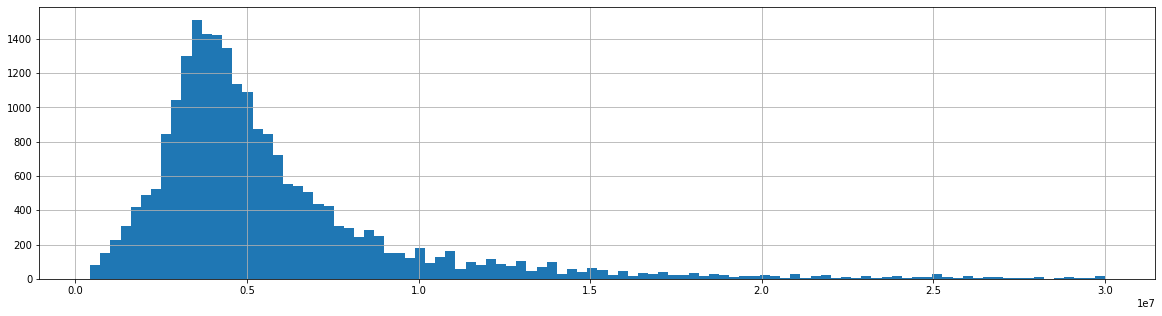

In [98]:
# Строим гистаграмму
data.last_price.hist(bins = 100, figsize = (20,5));

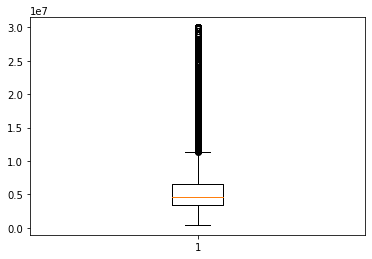

In [99]:
plt.boxplot(data['last_price']);

##### Столбец 'living_area'

In [100]:
data['living_area'].describe()

count    22386.000000
mean        32.779728
std         17.322869
min          2.000000
25%         18.000000
50%         30.000000
75%         41.000000
max        180.000000
Name: living_area, dtype: float64

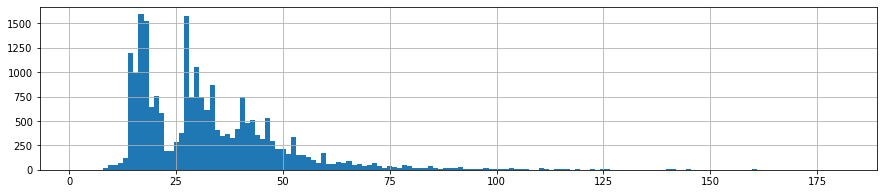

In [101]:
# Строим гистаграмму
data.living_area.hist(bins = 150, figsize = (15,3));

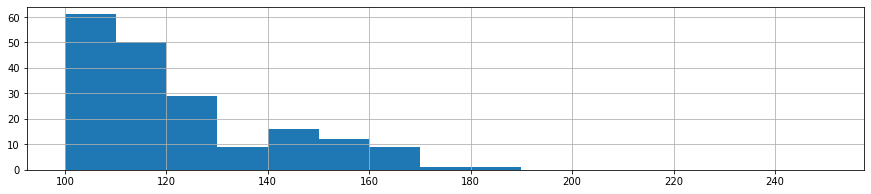

In [102]:
# Ограничим диапазон значениями от 100 квадратных метров
data.living_area.hist(bins = 15, figsize = (15,3), range = (100,250));

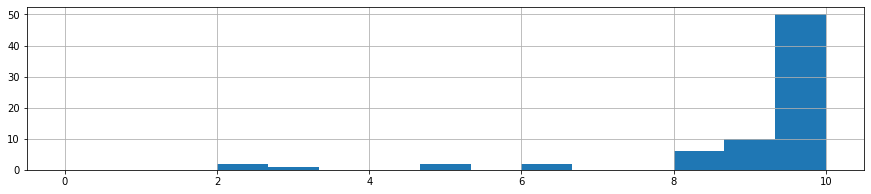

In [103]:
# Ограничим диапазон значениями от 0 до 5 квадратных метров
data.living_area.hist(bins = 15, figsize = (15,3), range = (0, 10));

In [104]:
# Считаем количество строк с площадью меньше 8 и больше 140 метров
data[(data['living_area'] < 8) | (data['living_area'] > 140)]['living_area'].count()

42

In [105]:
# Удаляем строки с площадью меньше 8 и больше 140 метров
data = data[~((data['living_area'] < 8) | (data['living_area'] > 140))].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

22344

##### Столбец 'kitchen_area'

In [106]:
data['kitchen_area'].describe()

count    22344.000000
mean         9.872001
std          5.003011
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max         70.000000
Name: kitchen_area, dtype: float64

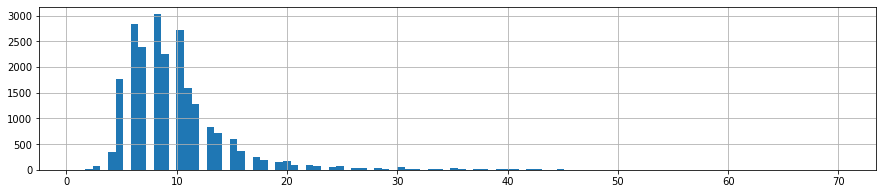

In [107]:
# Строим гистаграмму
data.kitchen_area.hist(bins = 100, figsize = (15,3));

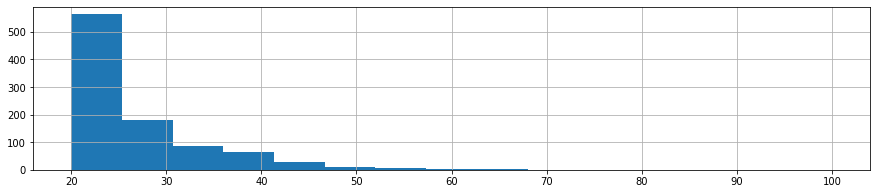

In [108]:
# Ограничим диапазон значениями от 20 до 100 квадратных метров
data.kitchen_area.hist(bins = 15, figsize = (15,3), range = (20, 100));

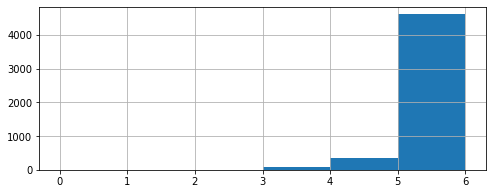

In [109]:
# Ограничим диапазон значениями от 0 до 6 квадратных метров
data.kitchen_area.hist(bins = 6, figsize = (8,3), range = (0,6));

In [110]:
# Считаем количество строк с площадью меньше 4 и больше 40 метров
data[(data['kitchen_area'] < 4) | (data['kitchen_area'] > 40)]['kitchen_area'].count()

141

In [111]:
# Удаляем строки с площадью меньше 4 и больше 40 метров
data = data[~((data['kitchen_area'] < 4) | (data['kitchen_area'] > 40))].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

22203

##### Столбец 'floor'

In [112]:
data['floor'].describe()

count    22203.000000
mean         5.906769
std          4.888363
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

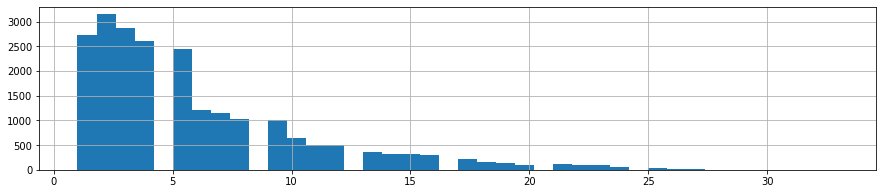

In [113]:
# Строим гистаграмму
data.floor.hist(bins = 40, figsize = (15,3));

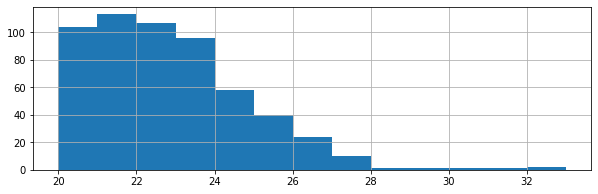

In [114]:
# Строим гистаграмму для 20 - 33 этажей
data.floor.hist(bins = 13, figsize = (10,3), range=(20, 33));

In [115]:
# Считаем количество строк c этажом выше 27го
data[(data['floor'] > 27)]['floor'].count()

6

In [116]:
# Удаляем 
data = data[(data['floor'] <= 27)].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

22197

##### Столбец 'floors_total'

In [117]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22197 entries, 0 to 22196
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           22197 non-null  int64         
 1   last_price             22197 non-null  float64       
 2   total_area             22197 non-null  float64       
 3   first_day_exposition   22197 non-null  datetime64[ns]
 4   rooms                  22197 non-null  int64         
 5   ceiling_height         22197 non-null  float64       
 6   floors_total           22197 non-null  int64         
 7   living_area            22197 non-null  int64         
 8   floor                  22197 non-null  int64         
 9   is_apartment           22197 non-null  bool          
 10  studio                 22197 non-null  bool          
 11  open_plan              22197 non-null  bool          
 12  kitchen_area           22197 non-null  int64         
 13  b

In [118]:
data['floors_total'].describe()

count    22197.000000
mean        10.757805
std          6.607935
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [119]:
data['rooms'].describe()

count    22197.000000
mean         2.022390
std          0.981902
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [120]:
data['floors_total'] = data['floors_total'].astype(int)

In [121]:
data['floors_total'].dtype

dtype('int64')

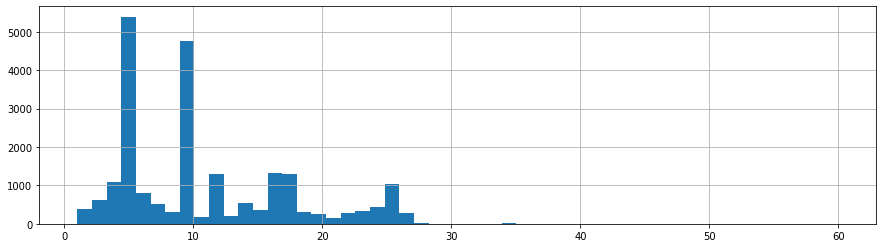

In [122]:
# Строим гистаграмму
data.floors_total.hist(bins = 52, figsize = (15,4));

In [123]:
# Находим выбивающиеся значения
data['floors_total'].value_counts().head(10)

5     5391
9     3629
16    1329
12    1307
10    1124
4     1101
25    1048
17     807
6      801
3      612
Name: floors_total, dtype: int64

Пики на уровне 5, 9 указывают на то, наиболее часто встречающиейся типы домов имеют 5 и 9 этажей. Также часто встречаются здания с 16, 12, 10, 25 этажами

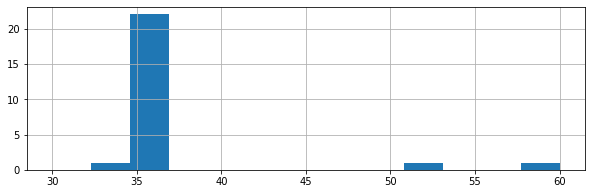

In [124]:
# Строим гистаграмму для 30 - 60 этажей
data.floors_total.hist(bins = 13, figsize = (10,3), range=(30, 60));

In [125]:
# Считаем количество строк c этажом выше 40
data[(data['floors_total'] > 40)]['floors_total'].count()

2

In [126]:
# Удаляем 
data = data[(data['floors_total'] < 40)].reset_index(drop=True)

# Проверяем количество строк после удаления
data.shape[0]

22195

In [127]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [128]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


**Вывод:** Из среза "нормальных" квартир мы убрали редкие значения, по которым надо проводить отдельную работу, а также аномальные значения, которые,скорее всего, являются ошибкой пользователя при заполнении.

`'rooms'` - удалена 31 строка с количеством комнат больше 8ми

`'total_area'` - удалены 119 строк с площадью меньше 20 и больше 250 метров

`'ceiling_height'` - были обнаружены значения 20-33 метра (причина появления - опечатки). Значения были восстановлены. Также было найдено 38 значений с высотой потолков до 2.3 х метров и выше 5 метров. Решено было их удалить.

`'days_exposition'` - выявлены выбивающиеся значения: 0 (объявления, которые были удалены или сняты с публикации в день размещения) 7, 30, 45, 60, 90 (сроки публикации разных типов объявлений).Чтобы не потерять большое количество строк, удалены только объявления, находящиеся в продаже более 800 дней (573 строки)

`'last_price'` - обнаружены и удалены: 1 значение с ценой 12190 р. и 271 значение > 30 млн.руб (max=763млн)

`'living_area'` - найдено и удалено 60 строк с площадью меньше 8 и больше 140 метров

`'kitchen_area'` - найдено и удалено 147 строк с площадью меньше 4 и больше 40 метров

`'floors'` - найдено и удалено 6 строк c этажом выше 27го

`'floors_total'` - найдено и удалено 2 значения c количеством этажей больше 40

Уровень потерь записей на этапе предобработки. Изначальный датасет содержит 23699 строк, после предобработки данный и очистки от аномальных значений - 22144 строки, что составляет около 6.5% от всего датасета

### Добавьте в таблицу новые столбцы

In [129]:
# цена одного квадратного метра
data['price_per_sqm'] = (data['last_price'] / data['total_area']).round(2)

# день недели публикации объявления
data['day_of_week'] = data['first_day_exposition'].dt.weekday 

# месяц публикации объявления
data['month_of_publication'] = data['first_day_exposition'].dt.month

# год публикации объявления
data['year_of_publication'] = data['first_day_exposition'].dt.year 

# расстояние до центра города в километрах
data['distance_to_center_km'] = (data['city_centers_nearest'] / 1000).round() 

In [130]:
def floor_type(row):
    if row['floor'] <= 0 or row['floors_total'] <= 0:
        return 'некорректные данные'
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1) # тип этажа квартиры

### Проведите исследовательский анализ данных

####  Изучение параметров: площадь,цена, число комнат, высота потолков

In [131]:
quantitative_columns = ['total_area', 'living_area', 'kitchen_area', 'last_price', 
                        'rooms', 'ceiling_height', 'floors_total', 
                        'city_centers_nearest', 'parks_nearest']

data[quantitative_columns].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,city_centers_nearest,parks_nearest
count,22195.000000,22195.000000,22195.000000,2.219500e+04,22195.000000,22195.000000,22195.000000,17075.000000,7431.000000
mean,57.334351,32.591485,9.789682,5.643356e+06,2.022437,2.724150,10.753728,14443.010805,491.652671
std,25.177865,16.573942,4.567854,3.831244e+06,0.981922,0.242251,6.594151,8550.275730,337.128957
min,20.000000,8.000000,4.000000,4.300000e+05,0.000000,2.300000,1.000000,208.000000,1.000000
25%,40.000000,19.000000,7.000000,3.400000e+06,1.000000,2.600000,5.000000,9782.000000,289.000000
50%,51.100000,30.000000,9.000000,4.600000e+06,2.000000,2.640000,9.000000,13242.000000,456.000000
75%,67.885000,41.000000,11.000000,6.550000e+06,3.000000,2.800000,16.000000,16398.500000,613.000000
max,250.000000,140.000000,40.000000,3.000000e+07,7.000000,4.900000,36.000000,65952.000000,3190.000000


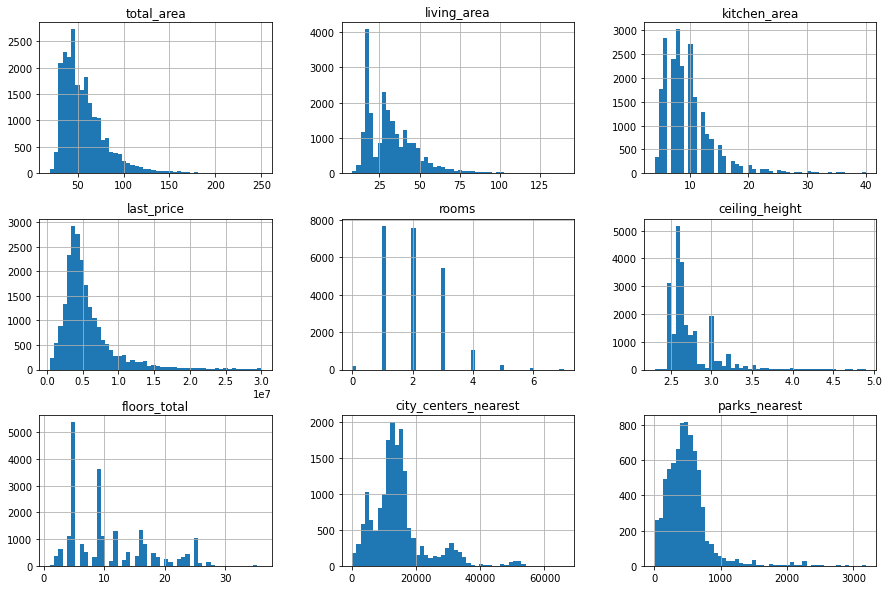

In [132]:
 # выводим гистограммы для обновленной таблицы
data[quantitative_columns].hist(bins = 50, figsize=(15, 10));

На основе представленных обработанных данных можно сделать следующие наблюдения относительно рынка недвижимости:

**Общая площадь:**
Средняя общая площадь квартир составляет около 57 кв. м, а медианное значение - 51 м, при этом стандартное отклонение довольно велико (примерно 25.1 кв. м), что указывает на широкий диапазон размеров квартир — от малогабаритных (минимум 20 кв. м) до очень просторных (максимум 250 кв. м).

**Жилая площадь:**
Средняя жилая площадь составляет примерно 32.6 кв. м, медианное значение - 30 кв. м. Разброс значений от 8 кв. м до 140 кв. м).

**Площадь кухни:**
Средняя площадь кухни около 9.8 кв. м (медиана - 9 кв. м) с максимальным значением в 40 кв. м, что может указывать на наличие квартир с большими кухнями или объединенными кухнями-гостиными.

**Цена объекта:**
Средняя цена квартиры составляет около 6.54 млн рублей, медианная цена - 4.65 млн рублей, но стандартное отклонение и диапазон цен (от 430 тыс. до 763 млн рублей) указывают на значительное разнообразие стоимости недвижимости. Это может отражать различия в размерах, расположении, качестве и уникальности объектов.

**Количество комнат:**
В среднем, квартиры имеют около 2 комнат, но имеются варианты от студий (0 комнат) до 7 комнат в больших квартирах.

**Высота потолков:**
Средняя высота потолков около 2.7 м (медиана 2.64 м), что является стандартной высотой для современных и старых зданий. Максимальная высота в 4.9 м может встречаться в квартирах с двухуровневыми потолками или в исторических зданиях.

**Этажность зданий:**
Среднее количество этажей в доме около 11, медианное значение - 9, с максимумом в 36 этажей.

**Расстояние до центра города:**
Среднее расстояние до центра города составляет примерно 14.4 км, медианное значение чуть меньше - 13.3 км. Есть разные варианты от близкого расположения (208 м) до довольно отдаленного (до 65.9 км).

**Расстояние до ближайшего парка:**
Среднее расстояние до ближайшего парка составляет около 491 м, медианное - 456 м, однако  многие объекты находятся далеко от зеленых зон (максимальное значение в 3190 м, большой разброс значений)

#### Изучение типа этажа

In [133]:
data['floor_type'].value_counts()

другой       16370
последний     3091
первый        2734
Name: floor_type, dtype: int64

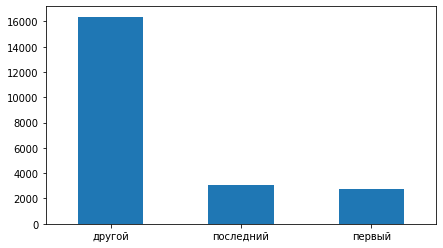

In [134]:
data['floor_type'].value_counts().plot(kind='bar', figsize=(7, 4), rot=0);

Параметр "тип этажа квартиры" может влиять на стоимость и желательность квартиры для покупателей из-за различий в уровне шума, приватности, видов из окон и других факторов.

1. Первый: легкий доступ, меньше приватности, возможен шум от улицы, бывают проблемы с безопасностью.
2. Последний: нет шума сверху, часто лучший вид, возможные проблемы с кровлей, сложности с отоплением, хуже доступность (особенно если в доме нет лифта).
3. Другой: баланс приватности и доступности, меньше шума, ограниченные виды и свет по сравнению с последним этажом.

#### Изучение времени продажи квартиры

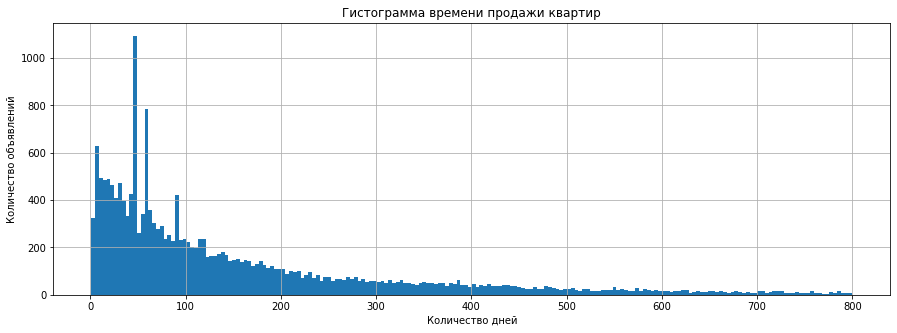

In [135]:
# Построение гистограммы для days_exposition
data['days_exposition'].hist(bins=200, figsize=(15, 5), range=(1, 800))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

In [136]:
# Получаем описание отфильтрованных данных (исключаем 0)
data[data['days_exposition'] != 0]['days_exposition'].describe()

count    19193.000000
mean       154.722451
std        164.135684
min          1.000000
25%         44.000000
50%         90.000000
75%        210.000000
max        800.000000
Name: days_exposition, dtype: float64

In [137]:
# Фильтруем DataFrame, исключая строки, где 'days_exposition' равно 0, 7, 30, 45, 60, 90
filtered_data = data[~data['days_exposition'].isin([0, 7, 30, 45, 60, 90])]

# Получаем описание отфильтрованных данных
filtered_data['days_exposition'].describe()

count    17193.000000
mean       167.225266
std        168.893504
min          1.000000
25%         43.000000
50%        107.000000
75%        232.000000
max        800.000000
Name: days_exposition, dtype: float64

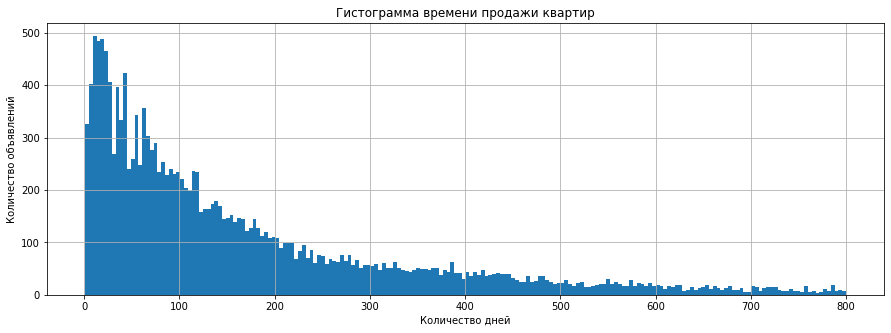

In [138]:
# Построение гистограммы для отфильтрованных данных
filtered_data['days_exposition'].hist(bins=200, figsize=(15, 5))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

**Описание результатов**

На этапе обработки аномальных значений были выявлены пики в значениях 0, 7, 30, 45, 60, 90. Временно отфильтруем их для рассчетов.

Среднее значение экспозиции объявления составляет примерно 167 дней (5.5 месяцев).

Медианное время продажи (107 дней) свидетельствует о том, что большинство квартир продаются примерно за 3.5 - 4 месяца

Продажи можно считать быстрыми, если они занимают менее 43 дней (25% квантиль), и необычно долгими, если время продажи превышает 232 дней (75% квантиль).

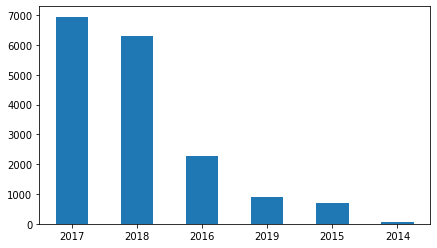

In [139]:
# Строим график распределения количества объявлений по годам
filtered_data['year_of_publication'].value_counts().plot(kind='bar', figsize=(7, 4), rot=0);

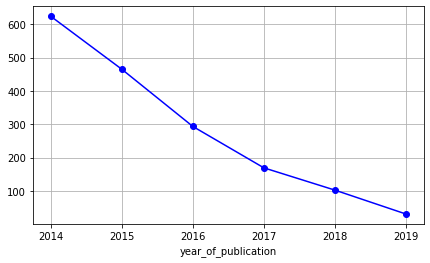

In [140]:
# Группировка данных по году публикации и расчет среднего количества дней на продажу
average_days_by_year = filtered_data.groupby('year_of_publication')['days_exposition'].mean()

# Строим график изменения средней скорости продаж по годам
average_days_by_year.plot(kind='line', figsize=(7, 4), marker='o', linestyle='-', color='b', grid=True);

Существует четкая тенденция к уменьшению среднего времени продажи недвижимости с 2014 по 2018 год. Это может указывать на более широкий доступ к информации через интернет.

На необычно низкое значение для 2019 года не стоит ориентироваться, поскольку в 'days_exposition' есть большое количество пропусков (так как объявления ещё актуальны)

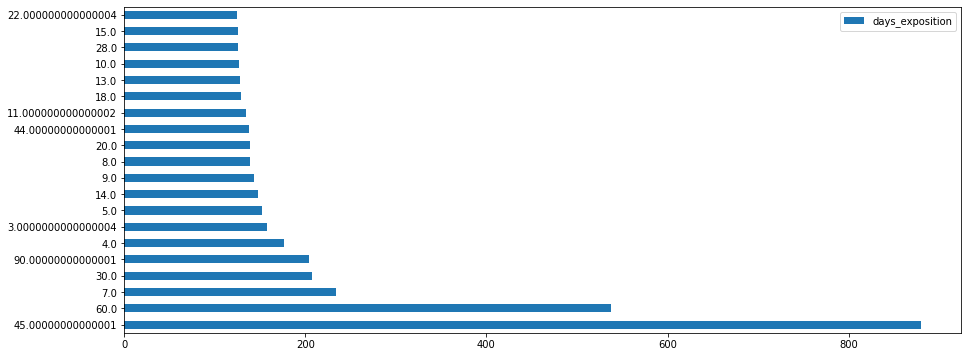

In [141]:
# check
# Моды на сырых данных
     
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

#### Определяем факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [142]:
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 
      'rooms', 'floor', 'ceiling_height']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,floor,ceiling_height
last_price,1.000000,0.781189,0.679644,0.611524,0.496743,0.084308,0.113612
total_area,0.781189,1.000000,0.930819,0.591099,0.792779,-0.024641,0.103611
living_area,0.679644,0.930819,1.000000,0.377864,0.868635,-0.107402,0.089874
kitchen_area,0.611524,0.591099,0.377864,1.000000,0.246687,0.151527,0.083812
rooms,0.496743,0.792779,0.868635,0.246687,1.000000,-0.161263,0.051428
floor,0.084308,-0.024641,-0.107402,0.151527,-0.161263,1.000000,-0.010478
ceiling_height,0.113612,0.103611,0.089874,0.083812,0.051428,-0.010478,1.000000


Анализируя представленные коэффициенты корреляции Пирсона между ценой квартиры и различными параметрами, можно сделать следующие выводы о зависимости цены от этих параметров:

##### Зависимость цены от размеров общей, жилой и кухонной площади 


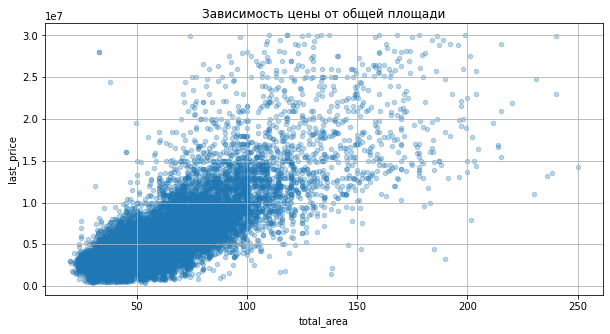

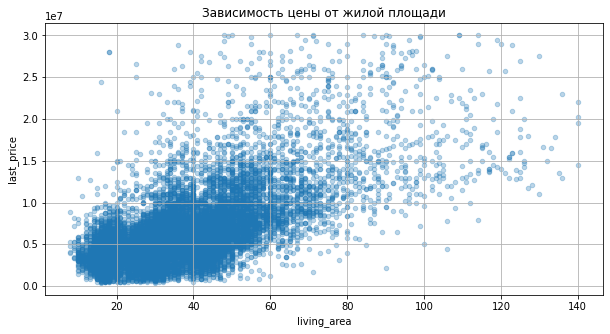

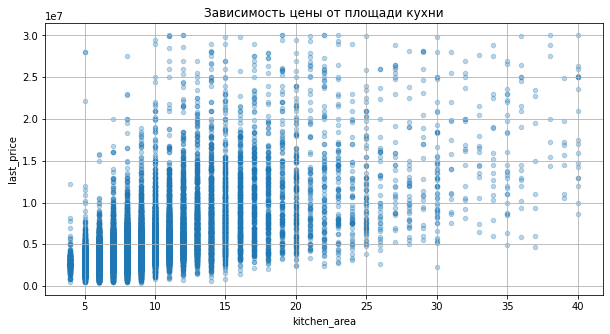

In [143]:
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), alpha=0.3);
plt.title('Зависимость цены от общей площади');

data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), alpha=0.3);
plt.title('Зависимость цены от жилой площади');

data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(10, 5), alpha=0.3);
plt.title('Зависимость цены от площади кухни');

**Общая площадь (total_area):**
Наибольший коэффициент корреляции (0.78). То есть чем больше площадь квартиры, тем выше её цена.

**Жилая площадь (living_area):**
С коэффициентом корреляции 0.68, жилая площадь также имеет сильное влияние на цену квартиры.

**Площадь кухни (kitchen_area):**
Показатель с коэффициентом корреляции 0.61 указывает на умеренную зависимость цены от размера кухни. Большие кухни, как правило, повышают стоимость недвижимости.


Графики зависимости между площадями (общей / жилой / кухонной)  и ценой довольно схожи, в них есть следующие закономерности:
С увеличением площади цена также имеет тенденцию к увеличению. Меньше всего выражена зависимость цены от площади кухни.

На графике присутствуют отдельные точки, которые сильно выделяются за пределы основного скопления данных. Это может быть связано с очень дорогими объектами на рынке, например, с квартирами в престижных районах или с особенностями этих объектов, такими как дорогая отделка, эксклюзивное местоположение итд.

С увеличением площади наблюдается увеличение разброса цен. Это может говорить о том, что для более крупных квартир ценообразующие факторы становятся более разнообразными. Для самых больших по площади объектов цена не всегда увеличивается пропорционально. Это может отражать ограниченный спрос на очень большие квартиры или особняки.

##### Зависимость цены от количества комнат (rooms):


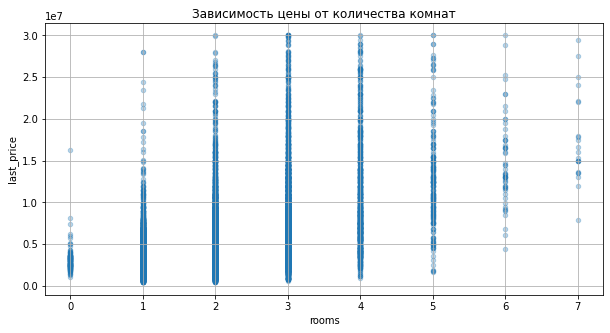

In [144]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(10, 5), alpha=0.3);
plt.title('Зависимость цены от количества комнат');

Коэффициент корреляции 0.5 говорит о том, что количество комнат также влияет на цену, но в меньшей степени по сравнению с площадью. Квартиры с большим количеством комнат, как правило, стоят дороже.


График показывает, что есть тенденция к увеличению цены с ростом количества комнат. Это ожидаемо, так как большее количество комнат обычно означает большую общую площадь. 

В пределах одного количества комнат цены могут сильно варьироваться, что говорит о влиянии других факторов, таких как местоположение, состояние объекта и дополнительные удобства.

##### Зависимость цены от этажа
Самый низкий коэффициент корреляции среди рассмотренных параметров площади и количества комнат (0.08) указывает на то, что цена слабо зависит от этажа, на котором расположена квартира.

Сгруппируем данные по этажу и медианной стоимости 1 кв.м.

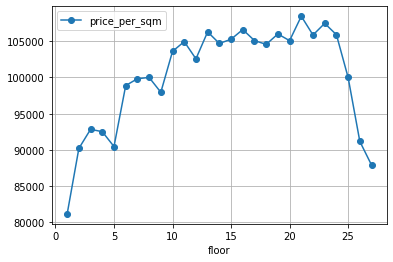

In [145]:
#группировка по этажу и цене кв.м.
data.pivot_table(index='floor', values='price_per_sqm', aggfunc='median').reset_index().plot(
                      x='floor', grid=True, style='o-');

Цена квадратного метра на 1-ом этаже ниже последующих, и предположительно также ниже будет цена последнего этажа. Наблюдаются проседания на 5, 9, 12 этажах. Скорее всего такая форма графика связана со стандартной этажностью домов и это тоже последние этажи. 

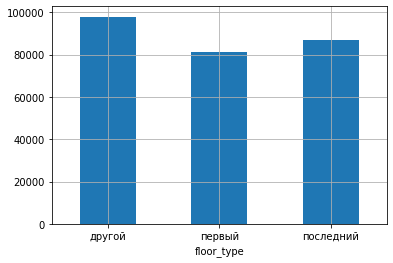

In [146]:
data.pivot_table(index='floor_type', values='price_per_sqm', aggfunc='median').reset_index().plot(
                      kind='bar', x='floor_type', y='price_per_sqm', grid=True, legend=False, rot=0);

**Вывод:** квартиры на первом этаже обычно имеют самую низкую стоимость за квадратный метр. Квартиры на последнем этаже тоже стоят меньше, чем на других.

##### Зависимость цены от даты размещения (day_of_week, month_of_publication, year_of_publication):
**Зависимость цены от года объявления**

In [147]:
# Сперва посчитаем количество объявлений для каждого года
data['year_of_publication'].value_counts().sort_index().to_frame()

,year_of_publication
2014,62
2015,770
2016,2470
2017,7882
2018,8236
2019,2775


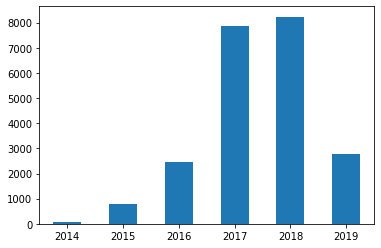

In [148]:
data['year_of_publication'].value_counts().sort_index().plot(kind='bar', rot=0);

Смотрим на кол-во записей по годам. Количество объявлений ежегодно растет (2019 - текущий год, поэтому он не показательный). Самый резкий скачек - c 2016 по 2017.
У нас всего 62 объявления 2014 года - 770 для 2015го: это может оказывать значительное влияние на результаты.

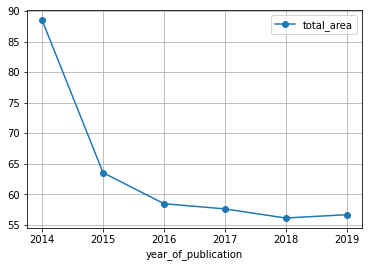

In [149]:
#группировка по году размещения объявления и средней площади квартиры
data.pivot_table(index='year_of_publication', values='total_area', 
                 aggfunc='mean').reset_index().plot(
                 x='year_of_publication', y='total_area', grid=True, style='o-');

По графику можно сделать вывод, что средняя площадь квартиры резко упала с 89 метров в 2014 году до 64 метров в 2015, затем снизилась до 59, дальнейшие колебания - не значительны. Однако вероятно причиной этого является небольшое количество объявлений для 2014-2015 годов.

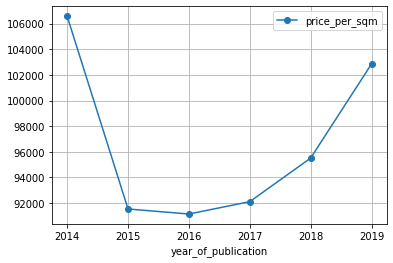

In [150]:
#группировка по году размещения объявления и медиане цены кв.м.
data.pivot_table(index='year_of_publication', values='price_per_sqm', 
                 aggfunc='median').reset_index().plot(
                 x='year_of_publication', y='price_per_sqm', grid=True, style='o-');

На данном графике видно, что в 2015 году произошло резкое падение стоимости квадратного метра. Начиная с 2017 года можно увидеть постепенный рост. Разница между максимальной и минимальной ценой более 15 тысяч рублей.

**Зависимость цены от месяца размещения**

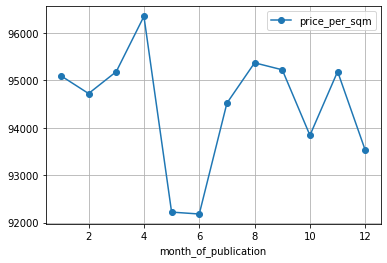

In [151]:
#группировка по месяцу размещения объявления и медиане цены кв.м.
data.pivot_table(index='month_of_publication', values='price_per_sqm', 
                 aggfunc='median').reset_index().plot(x='month_of_publication', 
                 y='price_per_sqm', grid=True, style='o-');

Заметное снижение цены в мае и июне, наиболее высокая цена в апреле и августе. Возможно, это связано с сезоном отпусков. Разброс между максимальной и минимальной ценой довольно мал — до 4 тысяч рублей.

**Зависимость цены от дня размещения**

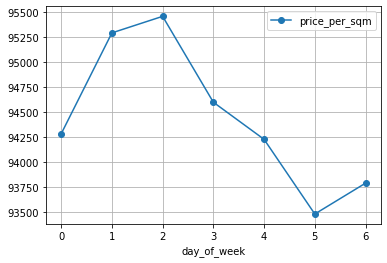

In [152]:
#группировка по дню размещения объявления и медиане цены кв.м.
data.pivot_table(index='day_of_week', values='price_per_sqm', 
                 aggfunc='median').reset_index().plot(x='day_of_week', 
                y='price_per_sqm', grid=True, style='o-');

Максимум цены за 1 кв.м. приходится на среду, минимум - на субботу и воскресенье. Разница не значима — менее 2 тысяч рублей.

**Вывод:**
Год публикации имеет наибольшее влияние на цену квадратного метра жилья. В 2015 стоимость резко упала, в 2016 году была минимальной, затем начался рост. Однако стоит учесть, что в 2014-2015 году количество объявлений во много раз меньше, чем в другие годы.
Средняя площадь квартиры резко упала с 2014 по 2016, затем снизилась до 59, дальнейшие колебания - не значительны. 
Вероятной причиной этого является небольшое количество объявлений для 2014-2015 годов.

Прослеживается определенная сезонность: цены достигают пика в апреле и августе, что может быть связано с увеличением активности покупателей после нового года и летних отпусков. В мае и июне наблюдается спад, вероятно, из-за сезона отпусков. 

Есть и недельная динамика: максимальная цена за квадратный метр чаще всего фиксируется по средам, в то время как пятница и суббота обычно показывают минимальные значения.

#### Выборка 10 населённых пунктов с наибольшим числом объявлений

In [153]:
# Составляем список из десяти населенных пунктов в которых наибольшее кол-во объявлений
top_10 = data.pivot_table(index='locality_name', values='first_day_exposition', 
                          aggfunc='count').sort_values(by='first_day_exposition', 
                                                       ascending=False).head(10)
top_10.columns=['number_of_ads']
top_10.reset_index()

,locality_name,number_of_ads
0,Санкт-Петербург,14684
1,Мурино,546
2,Кудрово,450
3,Шушары,426
4,Всеволожск,379
5,Пушкин,346
6,Колпино,332
7,Парголово,321
8,Гатчина,269
9,Выборг,205


In [154]:
# рассчитываем среднюю стоимость кв. м. по населенным пунктам из полученного списка
top_10['cost_per_meter_mean'] = data.pivot_table(index='locality_name', values='price_per_sqm', aggfunc='mean').round(2)
top_10s = top_10.sort_values(by='cost_per_meter_mean', ascending=False).reset_index()
top_10s

,locality_name,number_of_ads,cost_per_meter_mean
0,Санкт-Петербург,14684,110306.89
1,Пушкин,346,102769.26
2,Кудрово,450,95250.88
3,Парголово,321,90162.39
4,Мурино,546,85922.97
5,Шушары,426,78202.42
6,Колпино,332,75180.83
7,Гатчина,269,69135.50
8,Всеволожск,379,68901.14
9,Выборг,205,58603.93


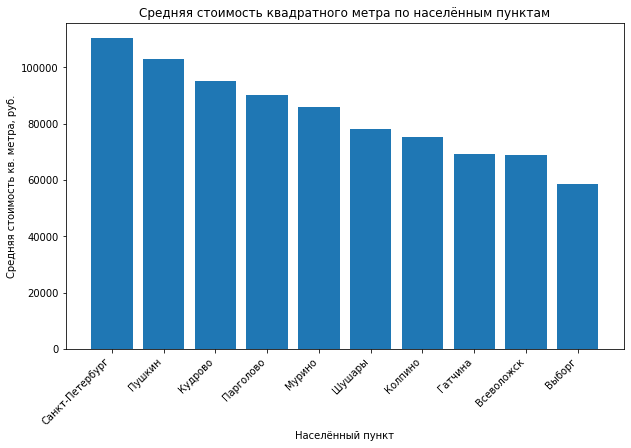

In [170]:
#строим график (бары), чтобы наглядно показать разницу в средней цене кв. метра
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10s['locality_name'], top_10s['cost_per_meter_mean'])
ax.set_title('Средняя стоимость квадратного метра по населённым пунктам')
ax.set_xlabel('Населённый пункт')
ax.set_ylabel('Средняя стоимость кв. метра, руб.')
ax.set_xticks(range(len(top_10s['locality_name'])))
ax.set_xticklabels(top_10s['locality_name'], rotation=45, ha='right')

plt.show()

**Вывод:** 
Санкт-Петербург - лидер по стоимости жилья среди населенных пунктов с наибольшим количеством объявлений, со средней ценой кв. метра 110,232.78 рублей. Это подтверждает статус города как крупного экономического и культурного центра.

Пушкин, Кудрово, Парголово и Мурино также имеют высокую стоимость жилья. Эти населенные пункты характеризуются активным строительством и развитием инфраструктуры.

Всеволожск и Выборг показывают наименьшую среднюю стоимость квадратного метра среди топ-10 рассмотренных населенных пунктов. Несмотря на близость к крупным городам, эти районы могут иметь менее развитую инфраструктуру или другие неблагоприятные факторы.

#### Зависимость цены от расстояния до центра (СПБ)
Выделяем квартиры в Санкт-Петербурге с помощью столбца locality_name и вычисляем их среднюю стоимость на разном удалении от центра

In [156]:
# Выделяем квартиры в Санкт-Петербурге
spb_data = data[data['locality_name'] == 'Санкт-Петербург']

# Рассчитываем среднюю цену для каждого километра
avg_price_per_km = spb_data.groupby('distance_to_center_km')['last_price'].mean()
avg_price_per_km.to_frame()

,last_price
distance_to_center_km,
0.0,1.131867e+07
1.0,1.177555e+07
2.0,1.078251e+07
3.0,9.618393e+06
4.0,1.013030e+07
5.0,1.062732e+07
6.0,9.438792e+06
7.0,9.156810e+06
8.0,8.563015e+06


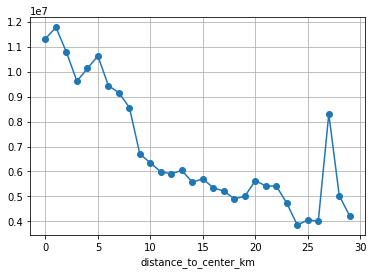

In [157]:
avg_price_per_km.plot(style='o-', grid=True);

In [158]:
spb_data.groupby('distance_to_center_km').size().sort_index().to_frame()

,0
distance_to_center_km,
0.0,15
1.0,155
2.0,248
3.0,311
4.0,600
5.0,774
6.0,512
7.0,356
8.0,547


In [159]:
# Смотрим объявления на 27 км
spb_data[spb_data['distance_to_center_km'] == 27]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,distance_to_center_km,price_per_sqm,day_of_week,month_of_publication,year_of_publication,floor_type
699,13,14350000.0,74.0,2017-11-28,2,3.3,5,30,3,False,...,1496.0,0,NaN,128,27.0,193918.92,1,11,2017,другой
5644,6,2250000.0,32.0,2018-02-27,1,2.6,2,16,2,False,...,NaN,0,NaN,178,27.0,70312.50,1,2,2018,последний


Причины выброса на 27-м км - малое количество объяввлений (2), одно из которых относится к квартире с необычно высокой ценой. Скорее всего, это недвижимость бизнес класса.

In [160]:
# Смотрим на количество квартир разных категорий на 3-м и 5-м км
filtered_spb_data = spb_data[spb_data['distance_to_center_km'].isin([1, 2, 3, 4, 5, 6])].groupby(
    ['distance_to_center_km', 'floor_type']).size().unstack()
filtered_spb_data['всего'] = filtered_spb_data['другой'] + filtered_spb_data['первый'] + filtered_spb_data['последний']

# Теперь рассчитываем долю для каждой категории этажа
filtered_spb_data['доля_другой'] = ((filtered_spb_data['другой'] / filtered_spb_data['всего']) * 100).round(2)
filtered_spb_data['доля_первый'] = ((filtered_spb_data['первый'] / filtered_spb_data['всего']) * 100).round(2)
filtered_spb_data['доля_последний'] = ((filtered_spb_data['последний'] / filtered_spb_data['всего']) * 100).round(2)
filtered_spb_data

floor_type,другой,первый,последний,всего,доля_другой,доля_первый,доля_последний
distance_to_center_km,,,,,,,
1.0,99,21,35,155,63.87,13.55,22.58
2.0,141,41,66,248,56.85,16.53,26.61
3.0,189,51,71,311,60.77,16.40,22.83
4.0,425,75,100,600,70.83,12.50,16.67
5.0,581,74,119,774,75.06,9.56,15.37
6.0,380,60,72,512,74.22,11.72,14.06


Причина пика на 5ом километре - самая низкая доля квартир на первых этажах.
Причина провала на 3ем километре - бОльшая доля квартир на первых и последних этажах.

Здесь результаты ожидаемы: самая высокая стоимость недвижимости наблюдается на расстоянии в 0 км от центра, то есть непосредственно в центре города, где средняя цена составляет примерно 11,318,670 рублей. Это подтверждает общее правило о том, что жильё в центральных районах городов обычно является самым дорогим из-за высокого спроса, развитой инфраструктуры и исторической ценности.

С увеличением расстояния от центра наблюдается тенденция к снижению стоимости недвижимости. Например, уже на расстоянии 1 км средняя стоимость снижается до примерно 21,206,720 рублей, а на расстоянии 9 км — до примерно 6,962,379 рублей. Наблюдается резкое падение средней цены между 7ым километром (14 миллионов 775 тысяч 150), 8ым километром (9 миллионов 969 тысяч 961) и 9-ым километром (6 миллионов 962 тысячи 379).

На расстоянии 4-6 км от центра наблюдается небольшое увеличение средней стоимости по сравнению с 3 км, что может быть связано с особенностями местоположения конкретных объектов или наличием в этих районах престижной недвижимости с хорошей инфраструктурой.

Повышение стоимости на отдалении в 27 км: Заметен неожиданный скачок в стоимости на расстоянии 27 км от центра до примерно 8,300,000 рублей, что может быть обусловлено наличием в этом районе объектов бизнес класса или исторических.

**Вывод:** В целом, данные подтверждают общее правило о том, что чем дальше от центра, тем ниже средняя стоимость жилья, хотя и с некоторыми исключениями на определённых расстояниях.

### Напишите общий вывод

#### Предобработка данных с описанием найденных проблем и путей их решения

В процессе предобработки данных были выявлены следующие ключевые проблемы:


Обнаружены **пропущенные значения** в столбцах:

- **`balcony` (количество балконов), `parks_around3000`, `ponds_around3000`** (количество парков и водоёмов в радиусе 3 км):  
  _Решение_: Пропуски интерпретированы как отсутствие балконов, парков или водоёмов в указанном радиусе и заменены на `0`.

- **`ceiling_height` (высота потолков)**  
  _Решение_: Заполнены медианным значением по каждому километру в Санкт-Петербурге. Остальные пропуски заполнены общей медианой.

- **`airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`**  
  (расстояния до важных объектов и их количество):  
  _Решение_: Пропуски оставлены как есть, так как заполнение медианой или средним может исказить результаты.

- **`living_area` (жилая площадь) и `kitchen_area` (площадь кухни)**  
  _Решение_: Заполнены синтетическими значениями.

- **`floors_total` (всего этажей в здании)**  
  _Решение_: Пропущенные значения удалены, так как скорее всего отсутствовали из-за незнания точных данных.

- **`is_apartment` (является ли объект апартаментами)**  
  _Решение_: Большое количество пропусков. Заменены на `False`, так как продавцы, вероятно, не заполняют этот параметр.

- **`locality_name` (название населенного пункта)**  
  _Решение_: Удалены строки с пропусками, так как их доля незначительна (`49` записей). Возможные причины — технические ошибки или дома вне населённых пунктов.

- **`days_exposition` (количество дней размещения объявления)**  
  _Решение_: Пропуски оставлены как есть, так как возможные причины их появления:  
  1. Объявления ещё активны.  
  2. Снятие объявления без указания даты.  
  3. Технические ошибки.


**Артефакты (аномалии):** 

Из анализа были исключены редкие значения и ошибки при заполнении:

- **`rooms`** (более `8` комнат)
- **`total_area`** (меньше `20` м² или больше `250` м²)
- **`days_exposition`** (более `800` дней)
- **`last_price`** (меньше `300` тыс. руб. или больше `30` млн руб.)
- **`living_area`** (меньше `8` м² или больше `140` м²)
- **`kitchen_area`** (меньше `4` м² или больше `40` м²)
- **`floors`** (этажи выше `27`-го)
- **`floors_total`** (больше `40` этажей)
- **`ceiling_height`** (меньше `2.3` м или больше `5` м)

Удалённые строки составляют около **6.5%** от всего датасета.


**Неявные дубликаты в названиях населённых пунктов:** 

- Были найдены различные обозначения одних и тех же населённых пунктов.  
  _Решение_: Лишние слова из названий удалены.

**Добавлены новые столбцы** 
- Цена одного квадратного метра (`cost_per_meter`)
- День недели публикации объявления (`day_of_week`)
- Месяц публикации объявления (`month`)
- Год публикации объявления (`year`)
- Расстояние до центра города в километрах (`distance_to_center_km`)


#### Ответы на цели проекта:

**Влияние параметров на стоимость квартиры**

**Коэффициент корреляции Пирсона между ценой и параметрами**:

| Параметр                  | Коэффициент корреляции |
|---------------------------|-----------------------|
| Общая площадь (`total_area`) | **0.78** |
| Жилая площадь (`living_area`) | **0.68** |
| Площадь кухни (`kitchen_area`) | **0.61** |
| Количество комнат (`rooms`) | **0.5** |
| Высота потолков (`ceiling_height`) | **0.1** |
| Этаж (`floor`) | **0.08** |

- **Площадь квартиры** — основной фактор, влияющий на цену.
- **Кухня** также влияет на стоимость, но меньше, чем общая или жилая площадь.
- **Количество комнат** связано с общей площадью, поэтому его влияние предсказуемо.
- **Высота потолков** и **этаж** оказывают слабое влияние.


**Влияние даты размещения объявления**
- Год публикации **имеет влияние**.
- Сезонность: **цены на пике в апреле и августе**, спад — в мае и июне.
- Дни недели: **среда — самый дорогой день**, **пятница и суббота — самые дешёвые**.

---

**Средняя цена квадратного метра по населённым пунктам**

| Населённый пункт | Средняя цена кв. м, руб. |
|------------------|-------------------------|
| **Санкт-Петербург** | **110 232** |
| Пушкин | 102 543 |
| Кудрово | 97 345 |
| Парголово | 92 810 |
| Мурино | 90 567 |
| **Всеволожск** | **68 901** |
| **Выборг** | **58 604** |

Вывод:  
- **Санкт-Петербург** — лидер по стоимости жилья.  
- **Всеволожск и Выборг** — самые дешёвые.  

---

**Зависимость цены от удалённости от центра Санкт-Петербурга**

| Расстояние от центра | Средняя цена квартиры, руб. |
|----------------------|----------------------------|
| 0 км | **11 318 670** |
| 9 км | 6 695 526 |
| 29 км | 4 210 000 |

Вывод: **Чем дальше от центра, тем ниже цена**.



#### Рекомендации для заказчика:

**1. Улучшение качества данных**
- Сделать выбор населённого пункта **обязательным**.
- Автоматически присваивать `0`, если не указан `balcony`, `parks_around3000`, `ponds_around3000`.
- Автоматически присваивать `False`, если не указан `is_apartment`.

**2. Улучшение разметки**
- Проверить населённые пункты с пропусками в `distance_to_center` и `airports_nearest`:  
  _Мурино, Кудрово, Всеволожск, Гатчина, Выборг, Новое Девяткино, Сертолово, Кириши, Бугры, Волхов и др._
- Добавить разметку парков и прудов для всех населённых пунктов с пропусками.

**3. Внедрение системы отслеживания аномалий**
- Автоматически проверять, не содержит ли объявление **нереалистичные значения** (например, 1 м² за 1000 рублей).
- Оповещать модераторов о возможных мошеннических объявлениях.

**Вывод:**  
Коррекция данных и автоматизация их обработки помогут **повысить точность анализа рынка недвижимости**.

### Бонус

In [161]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

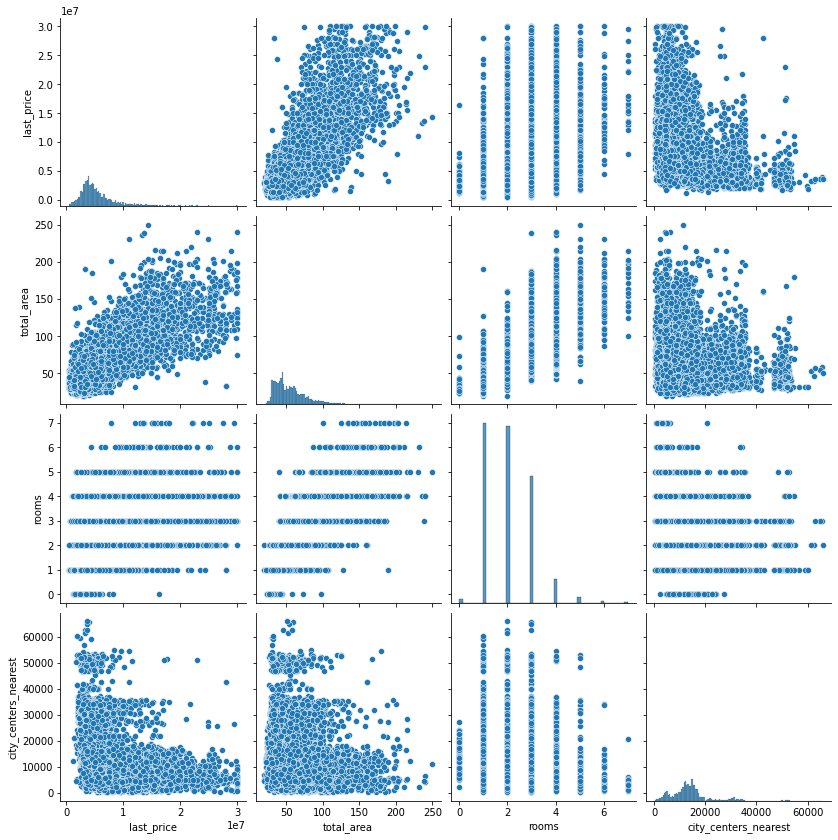

In [162]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'city_centers_nearest']])
plt.gcf().set_size_inches(12,12);


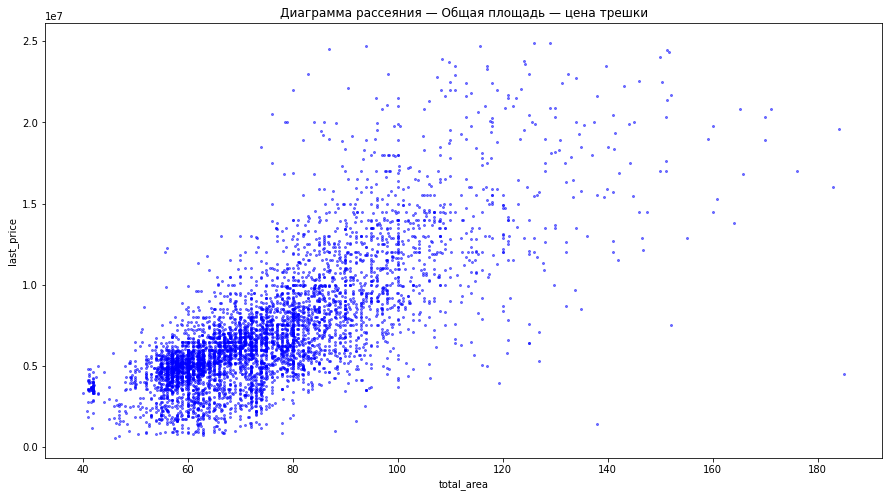

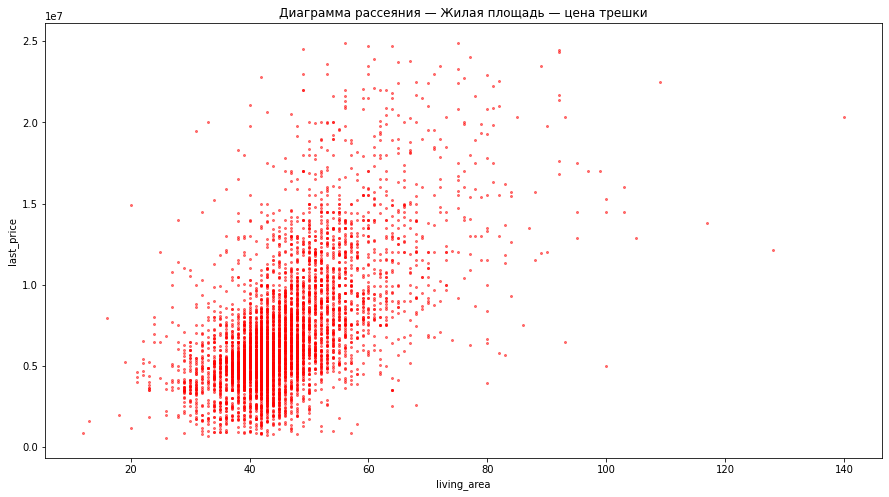

In [163]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='last_price' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — цена трешки')


data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter', 
        y='last_price' , x='living_area', alpha=0.5, figsize=(15,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Жилая площадь — цена трешки');

In [164]:
# check TOP-10
# способы группировки и сортировки информации

(
    data
    .groupby('locality_name')['last_price']
    .agg({'count', 'mean'})
    .sort_values(by = 'count', ascending = False)
    .head(10)
    
).sort_values(by = 'mean', ascending = False).style.format("{:,.0f}")

# .plot(y = 'mean', kind = 'bar')
# стайл и плот вместе не работают

,mean,count
locality_name,,
Санкт-Петербург,"6,734,527","14,684"
Пушкин,"6,075,203",346
Парголово,"4,496,793",321
Кудрово,"4,400,106",450
Шушары,"4,140,580",426
Колпино,"3,856,266",332
Всеволожск,"3,838,109",379
Мурино,"3,712,562",546
Гатчина,"3,541,648",269


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.